# Run this Notebook

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DeepRLCourse/Homework-1-Questions/blob/main/HW1_Notebook.ipynb)  
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/DeepRLCourse/Homework-1-Questions/blob/main/HW1_Notebook.ipynb)

# HW1: Introduction to RL
> - Full Name: **Payam Taebi**
> - Student ID: **400104867**


This notebook is designed to provide hands-on experience with RL modeling, algorithm implementation, and performance evaluation. Students will explore RL concepts through predefined environments and custom-designed settings.

Follow the instructions in each section to complete the homework.

## Setup Instructions
Seting up RL dependecies for first time may be challenging. Some  torch or gymnasium (Sklearn lib in SL world!) environments need additional set up on your system. If you encountered error and failure after hours of search and try, feel free to be in contact with TA's.  Run the following commands to install dependencies before starting the notebook:



In [ ]:
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.12).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
!pip install pyvirtualdisplay > /dev/null 2>&1
!pip install swig
!pip install stable-baselines3 "gymnasium[all]" pygame matplotlib numpy pandas

Hamid is CE student who loves learning about RL. He tried to use **Gymnasium** and **Stable-Baselines3** to solve games he played as a kid.  

He started to list the games which was provided in gymnasium library.

In [ ]:
from gymnasium import envs

all_envs = envs.registry
env_ids = [env_spec  for env_spec in all_envs]
print("Gymnasium envs listed:",sorted(env_ids))

Gymnasium envs listed: ['Acrobot-v1', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Ant-v5', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'Blackjack-v1', 'CarRacing-v3', 'CartPole-v0', 'CartPole-v1', 'CliffWalking-v0', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'GymV21Environment-v0', 'GymV26Environment-v0', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'HalfCheetah-v5', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Hopper-v5', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'Humanoid-v5', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'HumanoidStandup-v5', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedDoublePendulum-v5', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedPendulum-v5', 'LunarLander-v3', 'LunarLanderContinuous-v3', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Pusher-v2', 'Pusher-v4', 'Pusher-v5', 'Reacher-v2', 'Reacher-v4', 'Reacher-v5', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Swimmer-v5', 'Taxi-v3', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'W

Then He selected Mountain Car Game to work with:

In [ ]:
import gymnasium as gym
env = gym.make("MountainCar-v0", render_mode="rgb_array", goal_velocity=0.1)

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

print("Action Example: {}".format(env.action_space.sample()))
print("State Example: {}".format(env.observation_space.sample()))

Action Space Discrete(3)
State Space Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action Example: 2
State Example: [ 0.32070136 -0.0627006 ]


Hamid wanted to visualize the env for better understandig of gym envs. He had two options:


1.   rendering inside the colab
2.   rendering as video file



For ploting the game **inside** the colab he used **pyvirtualdisplay** package:

In [ ]:
from pyvirtualdisplay import Display
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

display = Display(visible=0, size=(400, 300))
display.start()

So He started modify the code to learn how action works and plot it. He selected action of

 *`2: Accelerate to the right`*

For every state of car.

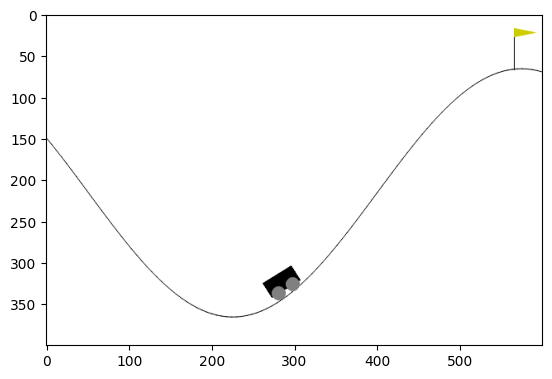

In [ ]:
obs, info = env.reset()
print(obs)

prev_screen = env.render( )
plt.imshow(prev_screen)

for i in range(40):
  # action = env.action_space.sample()  # Random action
  action = 2 # Action Hamid modified to practice
  obs, reward,terminated, truncated, info = env.step(action)
  screen = env.render()

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if terminated:
    break

ipythondisplay.clear_output(wait=True)
env.close()

But for saving game as **video** he defined a function (it's okay if you don't understand just try to run the code and see the output, then try to modify envs!):

In [ ]:
import logging
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo

training_period = 250  # record the agent's episode every 250
num_training_episodes = 1000  # total number of training episodes

env = gym.make("MountainCar-v0", render_mode="rgb_array")
env = RecordVideo(env, video_folder="MountainCar-v0-agent", name_prefix="training",
                  episode_trigger=lambda x: x % training_period == 0)
env = RecordEpisodeStatistics(env)

for episode_num in range(num_training_episodes):
    obs, info = env.reset()

    episode_over = False
    while not episode_over:
        action = env.action_space.sample()  # replace with actual agent
        obs, reward, terminated, truncated, info = env.step(action)

        episode_over = terminated or truncated

    logging.info(f"episode-{episode_num}", info["episode"])
env.close()

/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/MountainCar-v0-agent folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


The videos are in MountainCar-v0-agent folder of your colab folder.

But the car couldn't reach the goal state on top of the right hill. So he tried to implement RL algorithm for learning it

In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Parallel environments can bet set but Hamid set 1 env
vec_env = make_vec_env("MountainCar-v0", n_envs=5)

model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=100000)
model.save("ppo_MountainCar")

del model # remove to demonstrate saving and loading


Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -200     |
| time/              |          |
|    fps             | 3982     |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 10240    |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -200         |
| time/                   |              |
|    fps                  | 1739         |
|    iterations           | 2            |
|    time_elapsed         | 11           |
|    total_timesteps      | 20480        |
| train/                  |              |
|    approx_kl            | 0.0070823715 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.09        |
|    explained_variance   | 4.7e-05      

# **Understanding PPO Training Log in MountainCar-v0**

When training a PPO agent, the console outputs **training logs** at regular intervals. These logs help us understand how well the agent is learning. Below is an explanation of the key parameters.

---

### **General Training Information**
The top section of the log provides **general training details**:

- **`ep_len_mean`**: The average episode length. In MountainCar-v0, it starts at **200**, meaning the agent is **not reaching the goal**.
- **`ep_rew_mean`**: The average episode reward. Since the agent receives **-1 per step**, it starts at **-200**, which is the worst possible score.
- **`fps`**: Frames per second, showing how fast the training is running.
- **`iterations`**: The number of training updates that have been completed.
- **`total_timesteps`**: The total number of timesteps that have been used for training.

🚨 **Observation**: The agent is **not improving** if `ep_rew_mean` remains at **-200**.

---

### **Policy Training Metrics**
After multiple iterations, more detailed **training metrics** appear:

- **`approx_kl`**: Measures how much the new policy differs from the old one.  
  - A **low value (< 0.01)** means the policy is updating **gradually**.
  - A **high value** means the policy is changing **too aggressively**.
  
- **`clip_fraction`**: The percentage of actions being clipped due to PPO’s constraints.  
  - A **value close to 0** means the agent is **not changing much**.
  - If it's **too high**, the updates are being heavily restricted.

- **`entropy_loss`**: Represents the randomness of the policy.  
  - A **high entropy** (around -1.0) means the agent is still **exploring randomly**.
  - As the agent **learns**, entropy should **decrease**.

- **`explained_variance`**: Measures how well the value function predicts future rewards.  
  - **1.0** means the critic is **perfect** at predicting rewards.
  - **0.0 or negative values** mean the value function is **not learning properly**.
  - In our case, it stays near **0 or negative**, indicating that learning is poor.

- **`loss`**: The total loss of the value function.  
  - This should **decrease over time** as training progresses.

- **`policy_gradient_loss`**: Measures the improvement in the policy.  
  - **Negative values** indicate that the policy is being updated correctly.
  - If it's **close to zero**, learning is very slow.

- **`value_loss`**: The error in the critic’s predictions of rewards.  
  - A **high value** means the value function is not learning well.
  - This should **gradually decrease** during training.

🚨 **Observation**:  
- **Entropy is still high** → The agent is still exploring randomly.  
- **Explained variance is near 0 or negative** → The critic is not learning well.  
- **Policy updates are weak** → The agent is not improving significantly.

---


**Loading saved model**

After training model using PPO and saving it, Hamid started to load the model with the name he saved in cell above:

In [ ]:
model = PPO.load("ppo_MountainCar")

obs = vec_env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    print(obs, rewards, dones, info)
    if dones[0]:
      break

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[-4.0244973e-01 -8.9501665e-04]
 [-5.9190923e-01 -4.9488444e-04]
 [-4.5051163e-01 -1.5551503e-03]
 [-5.2009225e-01  9.8105927e-04]
 [-5.4751259e-01  1.1880863e-03]] [-1. -1. -1. -1. -1.] [False False False False False] [{'TimeLimit.truncated': False}, {'TimeLimit.truncated': False}, {'TimeLimit.truncated': False}, {'TimeLimit.truncated': False}, {'TimeLimit.truncated': False}]
[[-4.0523350e-01 -2.7837623e-03]
 [-5.9289539e-01 -9.8613428e-04]
 [-4.5361057e-01 -3.0989221e-03]
 [-5.2013749e-01 -4.5239081e-05]
 [-5.4714531e-01  3.6728603e-04]] [-1. -1. -1. -1. -1.] [False False False False False] [{'TimeLimit.truncated': False}, {'TimeLimit.truncated': False}, {'TimeLimit.truncated': False}, {'TimeLimit.truncated': False}, {'TimeLimit.truncated': False}]
[[-4.0988645e-01 -4.6529630e-03]
 [-5.9436554e-01 -1.4701452e-03]
 [-4.5823056e-01 -4.6199854e-03]
 [-5.2120870e-01 -1.0711981e-03]
 [-5.4760158e-01 -4.5626191e-04]] [-1. -1. -1. -1. -1.] [False False False False False] [{'TimeLimit.trunc

In [ ]:
import imageio
from IPython.display import Image, display
# Ensure the environment is created with rendering enabled
env = gym.make("MountainCar-v0", render_mode="rgb_array")

# Store frames for GIF
frames = []

# Reset the environment
obs, info = env.reset()

while True:
    # Select action using trained model
    action, _states = model.predict(obs)

    # Take action in environment
    obs, reward, terminated, truncated, info = env.step(action)

    # Render and save frame
    frames.append(env.render())

    # Break if the episode is done
    if terminated or truncated:
        break

# Close the environment
env.close()

# Save the frames as a GIF
gif_path = "ppo_mountaincar.gif"
imageio.mimsave(gif_path, frames, duration=0.05)

# Display the GIF in Jupyter Notebook
display(Image(filename=gif_path))


so it is not working good !

In [ ]:
!pip install sb3_contrib
from stable_baselines3 import DQN, A2C
from sb3_contrib import QRDQN

# **Task 1: Solving Predefined Environments (45 points)**
1.1. Choose two environments from the list which are implemented by  other developers and communities and train RL agents using stable-baselines3. Don't forget to check workshop notebook.

**Environments:**
- [CartPole](https://gymnasium.farama.org/environments/classic_control/cart_pole/)
- [FrozenLake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/)
- [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/)
- Flappy Bird (Custom env which you can google it)

📊 1.2. Algorithm Comparison:


 Compare RL algorithms and results (at least two algorithms e.g., PPO, DQN) based on:
- Total reward over time
- Hyperparameters (check the docs)


Env1 implementation. [ place for your code ]




In [ ]:
# Create Taxi environment with better visualization
env = gym.make("Taxi-v3", render_mode="rgb_array")

# Reset environment and get initial observation
obs, info = env.reset()

# Render initial state and display it as an image
frame = env.render()
plt.imshow(frame)
plt.axis("off")
plt.show()

# Print Environment Details
print("🔹 Observation Space:", env.observation_space)  # 500 discrete states
print("🔹 Action Space:", env.action_space)  # 6 discrete actions
print("🔹 Number of Possible States:", env.observation_space.n)
print("🔹 Number of Possible Actions:", env.action_space.n)
print("🔹 State Encoding (Taxi row, Taxi col, Passenger location, Destination):")
print("   - Taxi row: 0-4 (5 possible values)")
print("   - Taxi col: 0-4 (5 possible values)")
print("   - Passenger locations: {0: R, 1: G, 2: Y, 3: B, 4: In taxi}")
print("   - Destination locations: {0: R, 1: G, 2: Y, 3: B}")

# Taxi-v3 Action Mapping
action_mapping = {
    0: "Move South",
    1: "Move North",
    2: "Move East",
    3: "Move West",
    4: "Pick Up Passenger",
    5: "Drop Off Passenger"
}
print("\n🔹 Action Mapping:")
for key, value in action_mapping.items():
    print(f"   {key}: {value}")

# Check Possible Transitions from the Current State (Fix applied here)
state_info = env.unwrapped.P[obs]  # Access the actual transition probabilities

print("\n🔹 Available Actions and Transition Probabilities from Current State:")
for action, transitions in state_info.items():
    print(f"   Action {action} ({action_mapping[action]}):")
    for transition in transitions:
        prob, next_state, reward, done = transition
        print(f"      - Prob: {prob:.2f}, Next State: {next_state}, Reward: {reward}, Done: {done}")

# Close the environment
env.close()


🔹 Observation Space: Discrete(500)
🔹 Action Space: Discrete(6)
🔹 Number of Possible States: 500
🔹 Number of Possible Actions: 6
🔹 State Encoding (Taxi row, Taxi col, Passenger location, Destination):
   - Taxi row: 0-4 (5 possible values)
   - Taxi col: 0-4 (5 possible values)
   - Passenger locations: {0: R, 1: G, 2: Y, 3: B, 4: In taxi}
   - Destination locations: {0: R, 1: G, 2: Y, 3: B}

🔹 Action Mapping:
   0: Move South
   1: Move North
   2: Move East
   3: Move West
   4: Pick Up Passenger
   5: Drop Off Passenger

🔹 Available Actions and Transition Probabilities from Current State:
   Action 0 (Move South):
      - Prob: 1.00, Next State: 487, Reward: -1, Done: False
   Action 1 (Move North):
      - Prob: 1.00, Next State: 387, Reward: -1, Done: False
   Action 2 (Move East):
      - Prob: 1.00, Next State: 487, Reward: -1, Done: False
   Action 3 (Move West):
      - Prob: 1.00, Next State: 467, Reward: -1, Done: False
   Action 4 (Pick Up Passenger):
      - Prob: 1.00, Nex

# **Manhattan-Distance Potential Reward Wrapper for Taxi-v3**

This reward wrapper demonstrates a **potential-based shaping** approach in the Taxi-v3 environment, using **Manhattan distance** as the potential function.

---

## **1. Why Manhattan Distance?**
- **Simple** to compute, requiring only a direct calculation of
  $
    |r_1 - r_2| + |c_1 - c_2|
  $
  where $(r_1, c_1)$ is the taxi’s row and column, and $(r_2, c_2)$ is the target location.
- **No BFS overhead** each step, thus **faster** than a pathfinding approach.
- Though it ignores walls, it provides a **consistent metric** that generally encourages moving closer to the goal.

---

## 2. The Potential Function φ(s)

Let s be the current state, decoded as:
(taxi_row, taxi_col, passenger_idx, destination_idx).

- **If** the passenger is **not** in the taxi (passenger_idx < 4):

  φ(s) = ManhattanDistance(taxi_row, taxi_col, passenger_row, passenger_col)

- **If** the passenger **is** in the taxi (passenger_idx = 4):

  φ(s) = ManhattanDistance(taxi_row, taxi_col, destination_row, destination_col)

This defines a numerical “potential” indicating the distance to the next objective.

---

## **3. Potential-Based Shaping**
We apply the shaping formula:
$
r'(s,a,s') \;=\; r(s,a,s') \;+\; \gamma \,\Phi(s') \;-\; \Phi(s),
$
where
- $r(s,a,s')$ is the **original** environment reward,
- $\gamma$ is the discount factor (e.g., 0.99),
- $\Phi(s)$ is our **Manhattan distance** potential.

When the agent **reduces** the distance to the passenger (or destination), $\Phi(s') - \Phi(s) < 0$, making $\gamma \,\Phi(s') - \Phi(s)$ a **positive bonus**. If it moves **away**, it receives a **penalty**.

---

## **4. Wrapper Implementation**
We create a **custom Gym wrapper** (`PotentialRewardWrapper`) that:
1. **Overrides** `reset()`: Sets the initial $\Phi(s)$ (stored in `self.old_potential`).
2. **Overrides** `step(action)`:
   1. Calls the original environment’s `step()`.
   2. Computes the **new** potential $\Phi(s')$.
   3. Adds the shaping term $\gamma \,\Phi(s') - \Phi(s)$ to the original reward.
   4. Updates `self.old_potential` for the next step.

By overriding `step()`, we gain access to both **old** and **new** states, which is necessary for potential-based shaping.

---

## **5. Benefits & Caveats**
1. **Benefits**:
   - **Fast**: No expensive BFS at each step.
   - **Encourages** the agent to move **closer** to the passenger/destination.
   - **Preserves** the original task’s optimal policy (a property of potential-based shaping).

2. **Caveats**:
   - **Ignores walls**: This distance might not reflect the **actual** path cost if there are obstacles. However, it still works as a heuristic.
   - **Still needs** standard RL training: The agent must learn the best sequence of actions. This shaping **only** provides additional feedback.

---


In [ ]:
# ---------------------------------------------------------------------
# 1) Define the PotentialRewardWrapper using Manhattan distance
# ---------------------------------------------------------------------

# Predefined passenger/destination locations in Taxi-v3:
LOCATIONS = {
    0: (0, 0),  # R
    1: (0, 4),  # G
    2: (4, 0),  # Y
    3: (4, 3),  # B
}

def manhattan_distance(r1, c1, r2, c2):
    return abs(r1 - r2) + abs(c1 - c2)

def compute_potential(obs):
    """
    Compute a simple Manhattan distance to the current goal:
    - Passenger location (if passenger is not in the taxi)
    - Destination (if passenger is in the taxi)
    """
    # We assume there's a global 'env' or we replicate decode logic from env.unwrapped
    # For demonstration, we assume 'env' is accessible or set externally.
    taxi_row, taxi_col, pass_idx, dest_idx = env.unwrapped.decode(obs)

    if pass_idx < 4:
        # Passenger is not in the taxi
        goal_r, goal_c = LOCATIONS[pass_idx]
    else:
        # Passenger is in the taxi
        goal_r, goal_c = LOCATIONS[dest_idx]

    return manhattan_distance(taxi_row, taxi_col, goal_r, goal_c)

class PotentialRewardWrapper(gym.Wrapper):
    """
    Potential-based reward shaping using Manhattan distance.
    r'(s,a,s') = r(s,a,s') + gamma * Phi(s') - Phi(s).
    """
    def __init__(self, env, gamma=0.99):
        super().__init__(env)
        self.gamma = gamma
        self.old_potential = None

    def reset(self, **kwargs):
        obs, info = self.env.reset(**kwargs)
        self.old_potential = compute_potential(obs)
        return obs, info

    def step(self, action):
        next_obs, reward, done, truncated, info = self.env.step(action)
        new_potential = compute_potential(next_obs)
        shaped_reward = reward + self.gamma * new_potential - self.old_potential
        self.old_potential = new_potential
        return next_obs, shaped_reward, done, truncated, info


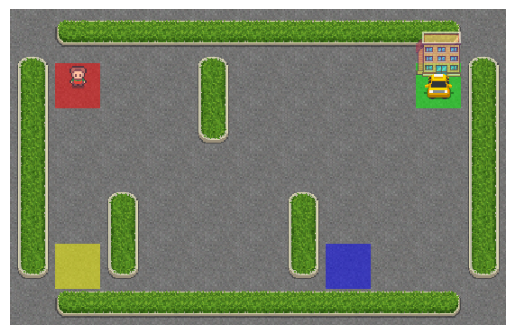

🔹 Observation Space: Discrete(500)
🔹 Action Space: Discrete(6)
🔹 Number of Possible States: 500
🔹 Number of Possible Actions: 6
🔹 Potential at Initial State: 4

🔹 Action Mapping:
   0: Move South
   1: Move North
   2: Move East
   3: Move West
   4: Pick Up Passenger
   5: Drop Off Passenger

🔹 Available Actions and Transition Probabilities from Current State (Unwrapped):
   Action 0 (Move South):
      - Prob: 1.00, Next State: 181, Reward: -1, Done: False
   Action 1 (Move North):
      - Prob: 1.00, Next State: 81, Reward: -1, Done: False
   Action 2 (Move East):
      - Prob: 1.00, Next State: 81, Reward: -1, Done: False
   Action 3 (Move West):
      - Prob: 1.00, Next State: 61, Reward: -1, Done: False
   Action 4 (Pick Up Passenger):
      - Prob: 1.00, Next State: 81, Reward: -10, Done: False
   Action 5 (Drop Off Passenger):
      - Prob: 1.00, Next State: 81, Reward: -10, Done: False


In [ ]:
# ---------------------------------------------------------------------
# 2) Create and Inspect the Wrapped Environment
# ---------------------------------------------------------------------
import matplotlib.pyplot as plt

# Create a Taxi-v3 environment with rgb_array rendering, then wrap with potential shaping
env = gym.make("Taxi-v3", render_mode="rgb_array")
env = PotentialRewardWrapper(env, gamma=0.99)

# Reset the environment
obs, info = env.reset()

# Render and display the initial state
frame = env.render()
plt.imshow(frame)
plt.axis("off")
plt.show()

# Print core environment details
print("🔹 Observation Space:", env.observation_space)  # Should still be Discrete(500)
print("🔹 Action Space:", env.action_space)            # Discrete(6)
print("🔹 Number of Possible States:", env.observation_space.n)
print("🔹 Number of Possible Actions:", env.action_space.n)
print("🔹 Potential at Initial State:", compute_potential(obs))

# Define an action mapping for readability
action_mapping = {
    0: "Move South",
    1: "Move North",
    2: "Move East",
    3: "Move West",
    4: "Pick Up Passenger",
    5: "Drop Off Passenger"
}

print("\n🔹 Action Mapping:")
for key, value in action_mapping.items():
    print(f"   {key}: {value}")

# Check the unwrapped environment's transition structure from the current state
base_env = env.unwrapped
state_info = base_env.P[obs]

print("\n🔹 Available Actions and Transition Probabilities from Current State (Unwrapped):")
for action, transitions in state_info.items():
    print(f"   Action {action} ({action_mapping[action]}):")
    for (prob, next_state, reward, done) in transitions:
        print(f"      - Prob: {prob:.2f}, Next State: {next_state}, Reward: {reward}, Done: {done}")

# Close the environment
env.close()


In [ ]:
import os
import time
import gymnasium as gym
from stable_baselines3 import A2C, PPO, DQN
from sb3_contrib import QRDQN, RecurrentPPO
from stable_baselines3.common.monitor import Monitor

# ---------------------------------------------------------------------
# 1) Define the algorithms you want to train
# ---------------------------------------------------------------------
model_classes = {
    "A2C": A2C,
    "PPO": PPO,
    "DQN": DQN,

 #   "QRDQN": QRDQN,
  #  "RecurrentPPO": RecurrentPPO,

}

# ---------------------------------------------------------------------
# 2) Define enriched hyperparameters for Taxi-v3
# ---------------------------------------------------------------------
model_hyperparams = {
    "A2C": {
        "verbose": 1,
        "policy": "MlpPolicy",
        "learning_rate": 0.001,
        "n_steps": 500,
        "gamma": 0.99,
        "ent_coef": 0.01,
    },
    "PPO": {
        "verbose": 1,
        "policy": "MlpPolicy",
        "learning_rate": 0.0003,
        "n_steps": 128,
        "batch_size": 64,
        "n_epochs": 4,
        "gamma": 0.99,
        "ent_coef": 0.0,
        "clip_range": 0.2,
    },
    "DQN": {
        "verbose": 1,
        "policy": "MlpPolicy",
        "learning_rate": 1e-3,
        "buffer_size": 50000,
        "learning_starts": 1000,
        "train_freq": 1,
        "gamma": 0.99,
        "target_update_interval": 500,
    },

 #   "QRDQN": {
  #      "verbose": 1,
  #      "policy": "MlpPolicy",
  #      "learning_rate": 1e-3,
  #      "buffer_size": 50000,
  #      "learning_starts": 1000,
  #      "train_freq": 1,
  #      "gamma": 0.99,
  #      "target_update_interval": 500,
  #  },
  #  "RecurrentPPO": {
  #      "verbose": 1,
  #      "policy": "MlpLstmPolicy",  # Important for RecurrentPPO
  #      "learning_rate": 0.0003,
  #      "n_steps": 128,
  #      "batch_size": 64,
  #      "n_epochs": 4,
  #      "gamma": 0.99,
  #      "ent_coef": 0.0,
  #      "clip_range": 0.2,
   # }

}

N_TIMESTEPS = 100_000

# ---------------------------------------------------------------------
# 3) Dictionaries to store training times and log directories
# ---------------------------------------------------------------------
training_times = {}
monitor_dirs = {}  # To keep track of where logs are stored


In [ ]:
# ---------------------------------------------------------------------
# 2) Helper function to create environment
#    If use_wrapper=True, wrap with PotentialRewardWrapper
# ---------------------------------------------------------------------
def make_taxi_env(use_wrapper=False, gamma=0.99):
    base_env = gym.make("Taxi-v3")

    if use_wrapper:
      env = PotentialRewardWrapper(base_env, gamma=gamma)
    else:
      env = base_env
    return env

# 3) Train all models in both "wrapped" & "unwrapped" modes
for algo_name, algo_class in model_classes.items():
    for use_wrapper in [False, True]:
        wrapper_str = "wrapped" if use_wrapper else "no_wrap"

        # Create environment
        env = make_taxi_env(use_wrapper=use_wrapper)

        # Monitor logging
        log_dir = f"./logs_{algo_name}_{wrapper_str}"
        os.makedirs(log_dir, exist_ok=True)
        env_monitored = Monitor(env, log_dir)

        # Pull hyperparams (including 'policy')
        hyperparams = model_hyperparams.get(algo_name, {})

        # Extract the policy from hyperparams
        # so we don't pass two policies
        policy = hyperparams.pop("policy", "MlpPolicy")

        # Instantiate the model with that policy
        model = algo_class(policy=policy, env=env_monitored, **hyperparams)

        start_time = time.time()
        model.learn(total_timesteps=N_TIMESTEPS)
        end_time = time.time()

        elapsed = end_time - start_time
        training_times[(algo_name, wrapper_str)] = elapsed
        monitor_dirs[(algo_name, wrapper_str)] = log_dir

        print(f"{algo_name} ({wrapper_str}) finished in {elapsed:.2f} s.")
        print("_" * 100)

        # Save model
        model.save(os.path.join(log_dir, f"{algo_name}_{wrapper_str}_model"))

        env_monitored.close()
        # Put the policy back so we don't mutate original dict
        hyperparams["policy"] = policy
        del model


Streaming output truncated to the last 5000 lines.
|    loss             | 0.00243  |
|    n_updates        | 49477    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.9     |
|    ep_rew_mean      | -60.1    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 512      |
|    fps              | 217      |
|    time_elapsed     | 234      |
|    total_timesteps  | 50898    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0127   |
|    n_updates        | 49897    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.8     |
|    ep_rew_mean      | -60      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 516      |
|    fps              | 217      |
|    time_elapsed     | 234      |
|   

In [ ]:
# ---------------------------------------------------------------------
# 4) Print a summary of training times
# ---------------------------------------------------------------------
print("\n=== Training Times Summary ===")
for (algo_name, wrapper_str), t in training_times.items():
    print(f"{algo_name} - {wrapper_str}: {t:.2f} s")



=== Training Times Summary ===
A2C - no_wrap: 121.81 s
A2C - wrapped: 107.18 s
PPO - no_wrap: 161.98 s
PPO - wrapped: 166.18 s
DQN - no_wrap: 485.87 s
DQN - wrapped: 463.37 s


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

########################################
# 1) SETTINGS
########################################
ALGOS = ["A2C", "PPO", "DQN",
         #"QRDQN", "RecurrentPPO"
         ]
WRAP_MODES = ["no_wrap", "wrapped"]

# Rolling window for smoothing episode rewards
ROLLING_WINDOW = 50

# Define a "success threshold" to test sample efficiency
# e.g., if the environment is quite harsh, you might use -100 or -200.
SUCCESS_THRESHOLD = -100


In [ ]:

########################################
# 2) LOAD MONITOR FILES
########################################
def load_monitor_csv(log_dir):
    """
    Locate a 'monitor.csv' in the specified directory, load it into a DataFrame.
    The first line is a comment line, so skip it.
    Returns a DataFrame with columns like: [r, l, t].
    """
    possible_files = [f for f in os.listdir(log_dir) if f.startswith("monitor") and f.endswith(".csv")]
    if not possible_files:
        raise FileNotFoundError(f"No 'monitor.csv' file found in {log_dir}")
    filepath = os.path.join(log_dir, possible_files[0])
    df = pd.read_csv(filepath, skiprows=1)  # skip the comment header
    # Columns typically: "r" (episode reward), "l" (episode length), "t" (time in seconds)
    return df

# Dictionary to store all loaded DataFrames
all_data = {}  # all_data[(algo, mode)] = DataFrame

for algo in ALGOS:
    for mode in WRAP_MODES:
        dir_name = f"./logs_{algo}_{mode}"  # e.g. ./logs_A2C_no_wrap
        if os.path.isdir(dir_name):
            try:
                df = load_monitor_csv(dir_name)
                all_data[(algo, mode)] = df
            except FileNotFoundError:
                print(f"No monitor CSV found for {algo} - {mode} in {dir_name}.")
        else:
            print(f"Directory not found: {dir_name}")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


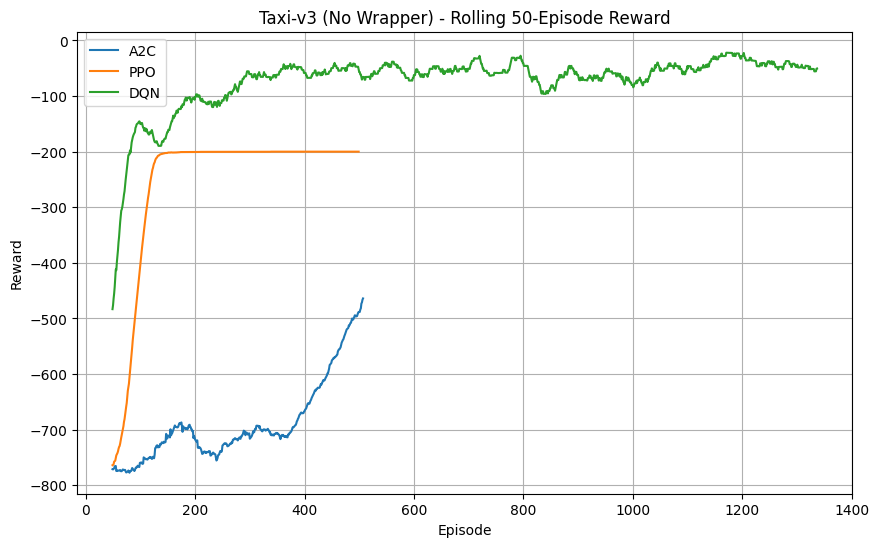

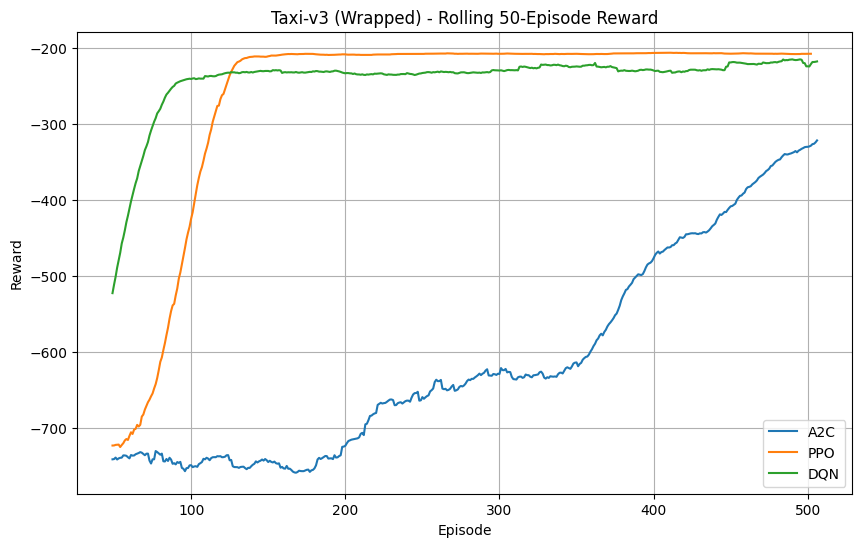

In [ ]:

########################################
# 3) PLOT LEARNING CURVES (NO WRAP vs. WRAPPED)
########################################

# --- FIGURE 1: NO WRAP ---
plt.figure(figsize=(10, 6))
for algo in ALGOS:
    key = (algo, "no_wrap")
    if key in all_data:
        df = all_data[key]
        rolling_r = df["r"].rolling(ROLLING_WINDOW).mean()
        plt.plot(rolling_r, label=algo)

plt.title(f"Taxi-v3 (No Wrapper) - Rolling {ROLLING_WINDOW}-Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()

# --- FIGURE 2: WRAPPED ---
plt.figure(figsize=(10, 6))
for algo in ALGOS:
    key = (algo, "wrapped")
    if key in all_data:
        df = all_data[key]
        rolling_r = df["r"].rolling(ROLLING_WINDOW).mean()
        plt.plot(rolling_r, label=algo)

plt.title(f"Taxi-v3 (Wrapped) - Rolling {ROLLING_WINDOW}-Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
########################################
# 4) COMPARE FINAL PERFORMANCE (BAR CHART OF FINAL ROLLING REWARD)
########################################
final_rewards = {}
for (algo, mode), df in all_data.items():
    rolling_r = df["r"].rolling(ROLLING_WINDOW).mean()
    # The last value of rolling average:
    final_val = rolling_r.iloc[-1] if not rolling_r.isna().all() else float('nan')
    final_rewards[(algo, mode)] = final_val

# Convert final_rewards to a bar chart
labels = []
values = []
for algo in ALGOS:
    for mode in WRAP_MODES:
        key = (algo, mode)
        if key in final_rewards:
            labels.append(f"{algo}_{mode}")
            values.append(final_rewards[key])

plt.figure(figsize=(12, 5))
x = np.arange(len(labels))
plt.bar(x, values, color="skyblue")
plt.xticks(x, labels, rotation=45, ha="right")
plt.title(f"Approx. Final (Last {ROLLING_WINDOW}-Ep Avg) Reward")
plt.ylabel("Reward")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


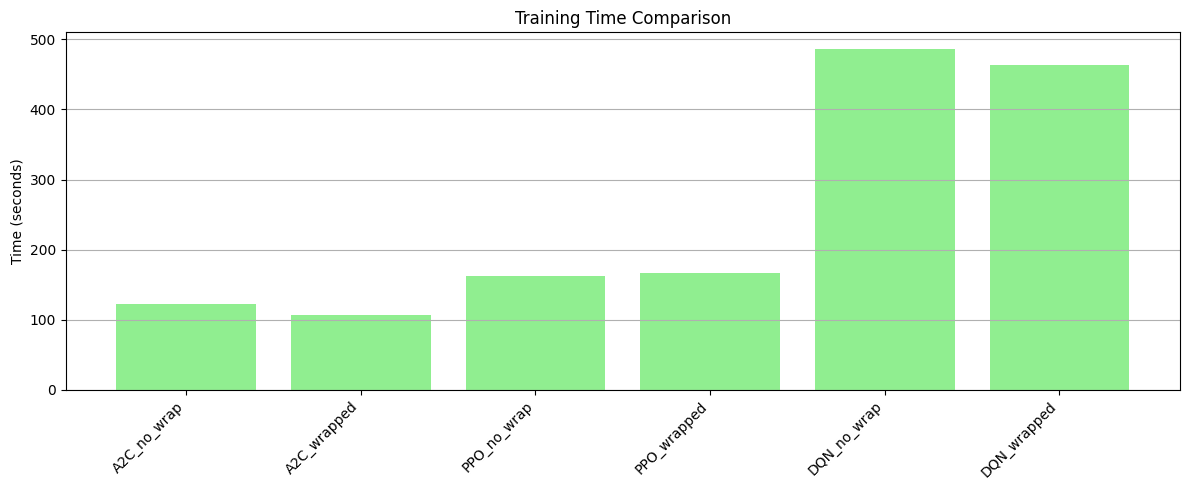

In [ ]:

########################################
# 5) TRAINING TIME COMPARISON (IF AVAILABLE)
########################################
# We assume you have a 'training_times' dict like training_times[(algo, mode)] = seconds
if "training_times" in globals():
    time_labels = []
    time_values = []
    for algo in ALGOS:
        for mode in WRAP_MODES:
            key = (algo, mode)
            if key in training_times:
                time_labels.append(f"{algo}_{mode}")
                time_values.append(training_times[key])

    plt.figure(figsize=(12, 5))
    x = np.arange(len(time_labels))
    plt.bar(x, time_values, color="lightgreen")
    plt.xticks(x, time_labels, rotation=45, ha="right")
    plt.title("Training Time Comparison")
    plt.ylabel("Time (seconds)")
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("training_times dict not found in globals, skipping training time bar chart.")



/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



=== Sample Efficiency: Episode Where Rolling Reward >= Threshold ===
Threshold = -100
A2C - no_wrap: did NOT surpass threshold.
A2C - wrapped: did NOT surpass threshold.
PPO - no_wrap: did NOT surpass threshold.
PPO - wrapped: did NOT surpass threshold.
DQN - no_wrap: reached threshold at episode 202.
DQN - wrapped: did NOT surpass threshold.


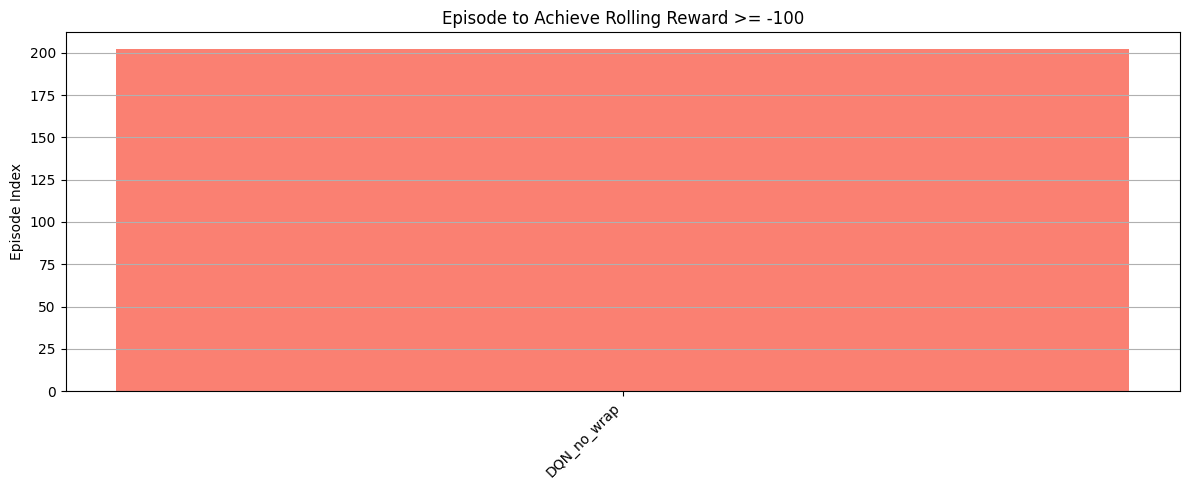

In [ ]:
########################################
# 6) SAMPLE EFFICIENCY: TIME TO THRESHOLD
########################################
# We'll define a function to find the FIRST episode where the rolling avg crosses SUCCESS_THRESHOLD
def get_time_to_threshold(df, threshold, window=50):
    rolling_r = df["r"].rolling(window).mean()
    # The earliest index where rolling_r >= threshold
    meets_threshold = rolling_r[rolling_r >= threshold]
    if len(meets_threshold) > 0:
        return meets_threshold.index[0]  # The "episode" index
    else:
        return None

time_to_threshold = {}  # time_to_threshold[(algo, mode)] = episode index or None
for (algo, mode), df in all_data.items():
    ep_index = get_time_to_threshold(df, SUCCESS_THRESHOLD, ROLLING_WINDOW)
    time_to_threshold[(algo, mode)] = ep_index

# Print a table of time_to_threshold
print("\n=== Sample Efficiency: Episode Where Rolling Reward >= Threshold ===")
print(f"Threshold = {SUCCESS_THRESHOLD}")
for algo in ALGOS:
    for mode in WRAP_MODES:
        key = (algo, mode)
        val = time_to_threshold.get(key, None)
        if val is None:
            print(f"{algo} - {mode}: did NOT surpass threshold.")
        else:
            print(f"{algo} - {mode}: reached threshold at episode {val}.")

# Optional bar chart for time_to_threshold
labels_thresh = []
values_thresh = []
for algo in ALGOS:
    for mode in WRAP_MODES:
        key = (algo, mode)
        ep = time_to_threshold.get(key, None)
        if ep is not None:
            labels_thresh.append(f"{algo}_{mode}")
            values_thresh.append(ep)

if len(values_thresh) > 0:
    plt.figure(figsize=(12, 5))
    x = np.arange(len(labels_thresh))
    plt.bar(x, values_thresh, color="salmon")
    plt.xticks(x, labels_thresh, rotation=45, ha="right")
    plt.title(f"Episode to Achieve Rolling Reward >= {SUCCESS_THRESHOLD}")
    plt.ylabel("Episode Index")
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No runs surpassed the threshold, so no bar chart for time-to-threshold.")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--- Testing A2C (no_wrap) ---
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


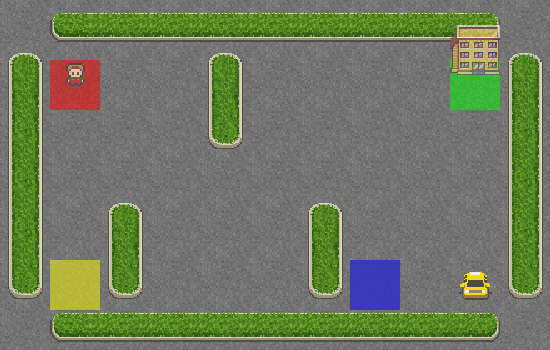



--- Testing A2C (wrapped) ---
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


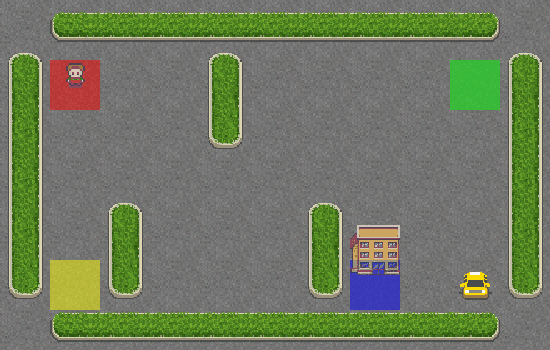



--- Testing PPO (no_wrap) ---
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


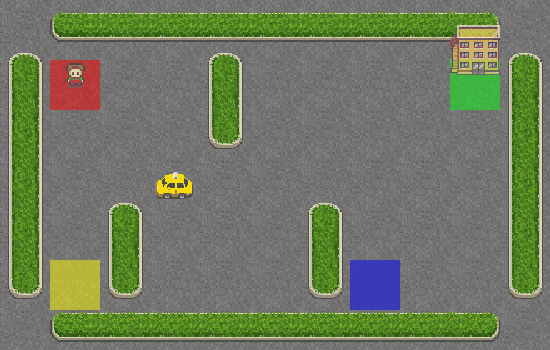



--- Testing PPO (wrapped) ---
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


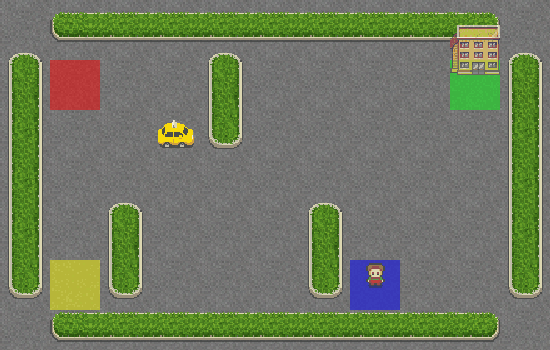



--- Testing DQN (no_wrap) ---
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


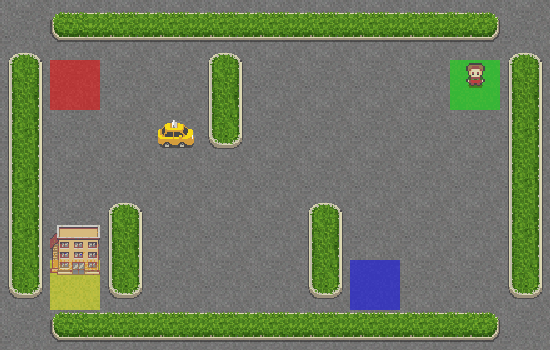



--- Testing DQN (wrapped) ---
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


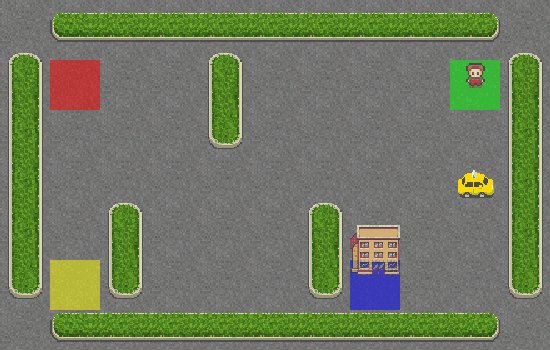

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Define the algorithms and wrapper modes used during training
ALGOS = ["A2C", "PPO", "DQN",
         #"QRDQN", "RecurrentPPO"
         ]
WRAP_MODES = ["no_wrap", "wrapped"]

for algo in ALGOS:
    for mode in WRAP_MODES:
        print(f"--- Testing {algo} ({mode}) ---")
        # Construct the path to the saved model (assumes consistent naming)
        model_path = f"./logs_{algo}_{mode}/{algo}_{mode}_model"

        # Create a test environment with rgb_array rendering.
        # (We want visual frames, so we override the render_mode.)
        test_env = gym.make("Taxi-v3", render_mode="rgb_array")

        # If the model was trained with a wrapper, wrap the test environment too.
        if mode == "wrapped":
            test_env = PotentialRewardWrapper(test_env, gamma=0.99)

        # Load the trained model using the appropriate class.
        model = model_classes[algo].load(model_path, env=test_env)

        # Run one episode and capture frames.
        frames = []
        obs, info = test_env.reset()
        # Convert observation from array to scalar if needed.
        if isinstance(obs, np.ndarray) and obs.shape == (1,):
            obs = obs.item()
        done, truncated = False, False

        while not (done or truncated):
            # Predict action; provide a batched observation.
            action, _ = model.predict(np.array([obs]), deterministic=True)
            # If action is returned as a numpy array, extract the scalar.
            if isinstance(action, np.ndarray):
                action = action.item()

            next_obs, reward, done, truncated, info = test_env.step(action)
            if isinstance(next_obs, np.ndarray) and next_obs.shape == (1,):
                next_obs = next_obs.item()
            obs = next_obs

            # Render frame (rgb_array) and store.
            frame = test_env.render()
            frames.append(frame)

        test_env.close()

        # Save the captured frames as a GIF.
        # Use 'duration' in seconds per frame; here 0.2 sec per frame.
        gif_filename = f"{algo}_{mode}_test.gif"
        imageio.mimsave(gif_filename, frames, duration=0.2)

        # Display the GIF inline.
        display(Image(filename=gif_filename))
        print("\n")


FROZEN LAKE

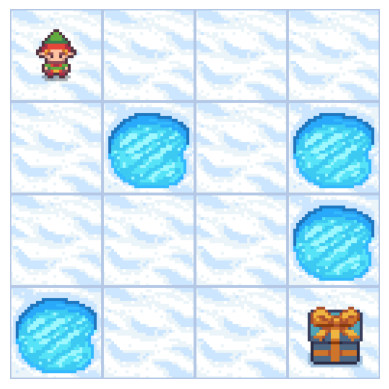

🔹 Observation Space: Discrete(16)
🔹 Action Space: Discrete(4)
🔹 Number of Possible States: 16
🔹 Number of Possible Actions: 4
🔹 State Encoding:
   - Each state is represented as an integer corresponding to a position in the Frozen Lake grid (e.g., 0 to 15 for a 4x4 grid).

🔹 Action Mapping:
   0: Left
   1: Down
   2: Right
   3: Up

🔹 Available Actions and Transition Probabilities from Current State:
   Action 0 (Left):
      - Prob: 0.33, Next State: 0, Reward: 0.0, Done: False
      - Prob: 0.33, Next State: 0, Reward: 0.0, Done: False
      - Prob: 0.33, Next State: 4, Reward: 0.0, Done: False
   Action 1 (Down):
      - Prob: 0.33, Next State: 0, Reward: 0.0, Done: False
      - Prob: 0.33, Next State: 4, Reward: 0.0, Done: False
      - Prob: 0.33, Next State: 1, Reward: 0.0, Done: False
   Action 2 (Right):
      - Prob: 0.33, Next State: 4, Reward: 0.0, Done: False
      - Prob: 0.33, Next State: 1, Reward: 0.0, Done: False
      - Prob: 0.33, Next State: 0, Reward: 0.0, Done: 

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt

# Create FrozenLake environment with rgb_array rendering
env = gym.make("FrozenLake-v1", render_mode="rgb_array")

# Reset environment and get initial observation
obs, info = env.reset()

# Render initial state and display it as an image
frame = env.render()
plt.imshow(frame)
plt.axis("off")
plt.show()

# Print Environment Details
print("🔹 Observation Space:", env.observation_space)   # e.g., Discrete(16)
print("🔹 Action Space:", env.action_space)             # e.g., Discrete(4)
print("🔹 Number of Possible States:", env.observation_space.n)
print("🔹 Number of Possible Actions:", env.action_space.n)
print("🔹 State Encoding:")
print("   - Each state is represented as an integer corresponding to a position in the Frozen Lake grid (e.g., 0 to 15 for a 4x4 grid).")

# FrozenLake Action Mapping
action_mapping = {
    0: "Left",
    1: "Down",
    2: "Right",
    3: "Up"
}

print("\n🔹 Action Mapping:")
for key, value in action_mapping.items():
    print(f"   {key}: {value}")

# Check Possible Transitions from the Current State
state_info = env.unwrapped.P[obs]  # Access the underlying transition probabilities

print("\n🔹 Available Actions and Transition Probabilities from Current State:")
for action, transitions in state_info.items():
    print(f"   Action {action} ({action_mapping[action]}):")
    for transition in transitions:
        prob, next_state, reward, done = transition
        print(f"      - Prob: {prob:.2f}, Next State: {next_state}, Reward: {reward}, Done: {done}")

# Close the environment
env.close()


# FrozenLakePotentialWrapper Using Manhattan Distance

This wrapper applies **potential-based reward shaping** to the FrozenLake environment using a **Manhattan-distance** potential. The goal is to provide extra reward feedback that encourages the agent to move toward the goal.

## 1. The Potential Function
For a given state $$s$$, which is an integer representing a cell in the grid, we decode it into its coordinates:
$$
\text{row} = \text{state} \div \text{grid_size}, \quad \text{col} = \text{state} \mod \text{grid_size}
$$
The potential is then defined as:
$$
\Phi(s) = - \text{ManhattanDistance}(s, \text{goal}) = -\Big(|\text{row} - \text{goal}_\text{row}| + |\text{col} - \text{goal}_\text{col}|\Big)
$$
A lower Manhattan distance (i.e., closer to the goal) results in a higher (less negative) potential.

## 2. Reward Shaping
The shaped reward is given by:
$$
r'(s,a,s') = r(s,a,s') + \gamma \Phi(s') - \Phi(s)
$$
- $$r(s,a,s')$$ is the original reward.
- $$\gamma$$ is the discount factor.
- $$\Phi(s)$$ is the potential before taking action, and $$\Phi(s')$$ is after.

This formulation **preserves the optimal policy** while providing additional guidance for the agent.

## 3. Implementation in FrozenLakePotentialWrapper
- **Initialization**: The wrapper determines the grid size and the goal position (using `env.unwrapped.desc` if available, or assuming the bottom-right corner as the goal).
- **Decoding**: The state (an integer) is decoded to $$(\text{row}, \text{col})$$.
- **Potential Calculation**: The Manhattan distance to the goal is computed and negated.
- **Reward Shaping**: In `step()`, the wrapper computes the new potential and adjusts the reward accordingly.

## 4. Environment Inspection
After wrapping, we:
- **Reset** and **render** the environment in `rgb_array` mode.
- **Display** the initial state.
- **Print** environment details:
  - Observation space and action space.
  - The number of states and actions.
  - The state encoding and the grid size.
  - The goal position.
- **Print** action mapping (0: Left, 1: Down, 2: Right, 3: Up).
- **List** available transitions from the current state using the unwrapped environment's transition dictionary.

This allows you to verify that the wrapper is functioning correctly and that the environment is set up for potential-based reward shaping.

By using this wrapper, you can now train your RL agents on FrozenLake with additional shaping signals to encourage more efficient learning toward the goal.


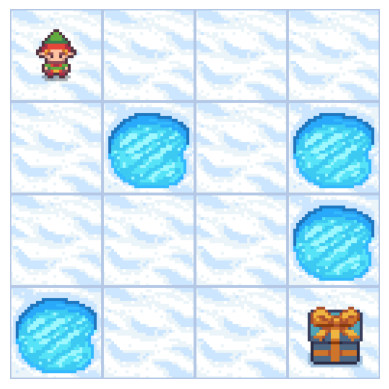

🔹 Observation Space: Discrete(16)
🔹 Action Space: Discrete(4)
🔹 Number of Possible States: 16
🔹 Number of Possible Actions: 4
🔹 State Encoding:
   - Each state is represented as an integer, which can be decoded as:
     row = state // grid_size, col = state % grid_size, where grid_size = 4
🔹 Goal Position (from wrapper): [3 3]

🔹 Action Mapping:
   0: Left
   1: Down
   2: Right
   3: Up

🔹 Available Actions and Transition Probabilities from Current State (Unwrapped):
   Action 0 (Left):
      - Prob: 0.33, Next State: 0, Reward: 0.0, Done: False
      - Prob: 0.33, Next State: 0, Reward: 0.0, Done: False
      - Prob: 0.33, Next State: 4, Reward: 0.0, Done: False
   Action 1 (Down):
      - Prob: 0.33, Next State: 0, Reward: 0.0, Done: False
      - Prob: 0.33, Next State: 4, Reward: 0.0, Done: False
      - Prob: 0.33, Next State: 1, Reward: 0.0, Done: False
   Action 2 (Right):
      - Prob: 0.33, Next State: 4, Reward: 0.0, Done: False
      - Prob: 0.33, Next State: 1, Reward: 0.0

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------
# FrozenLakePotentialWrapper using Manhattan distance
# ---------------------------------------------------------------------
class FrozenLakePotentialWrapper(gym.Wrapper):
    """
    A custom wrapper for FrozenLake that applies potential-based reward shaping.

    The potential function is defined as:

    $$\Phi(s) = - \\text{ManhattanDistance}(s, \\text{goal})$$

    and the shaped reward is computed as:

    $$r'(s,a,s') = r(s,a,s') + \\gamma \\Phi(s') - \\Phi(s)$$
    """
    def __init__(self, env, gamma=0.99):
        super().__init__(env)
        self.gamma = gamma
        self.old_potential = None

        # Determine grid size from observation_space (assumes a square grid)
        self.grid_size = int(np.sqrt(env.observation_space.n))

        # Determine goal position from env.unwrapped.desc if available
        self.goal_pos = None
        if hasattr(env.unwrapped, "desc"):
            # The description is a numpy array of bytes; goal is marked as b'G'
            desc = env.unwrapped.desc
            pos = np.argwhere(desc == b'G')
            if len(pos) > 0:
                self.goal_pos = pos[0]
        # Fallback: assume goal is at bottom-right corner
        if self.goal_pos is None:
            self.goal_pos = np.array([self.grid_size - 1, self.grid_size - 1])

    def decode_state(self, state):
        """
        Decode an integer state into its grid coordinates.
        """
        row = state // self.grid_size
        col = state % self.grid_size
        return np.array([row, col])

    def potential(self, state):
        """
        Compute the potential for a given state as the negative Manhattan distance
        to the goal. (Lower distance -> higher potential.)
        """
        pos = self.decode_state(state)
        goal = self.goal_pos
        return - (abs(pos[0] - goal[0]) + abs(pos[1] - goal[1]))

    def reset(self, **kwargs):
        obs, info = self.env.reset(**kwargs)
        self.old_potential = self.potential(obs)
        return obs, info

    def step(self, action):
        next_obs, reward, done, truncated, info = self.env.step(action)
        new_potential = self.potential(next_obs)
        shaped_reward = reward + self.gamma * new_potential - self.old_potential
        self.old_potential = new_potential
        return next_obs, shaped_reward, done, truncated, info

# ---------------------------------------------------------------------
# Create and Inspect the Wrapped FrozenLake Environment
# ---------------------------------------------------------------------
# Create the FrozenLake environment with rgb_array rendering for visualization.
env = gym.make("FrozenLake-v1", render_mode="rgb_array")

# Wrap the environment with our FrozenLakePotentialWrapper
env = FrozenLakePotentialWrapper(env, gamma=0.99)

# Reset the environment and get the initial observation
obs, info = env.reset()

# Render and display the initial state as an image
frame = env.render()
plt.imshow(frame)
plt.axis("off")
plt.show()

# Print core environment details
print("🔹 Observation Space:", env.observation_space)   # e.g., Discrete(16)
print("🔹 Action Space:", env.action_space)             # e.g., Discrete(4)
print("🔹 Number of Possible States:", env.observation_space.n)
print("🔹 Number of Possible Actions:", env.action_space.n)
print("🔹 State Encoding:")
print("   - Each state is represented as an integer, which can be decoded as:")
print("     row = state // grid_size, col = state % grid_size, where grid_size =", env.grid_size)
print("🔹 Goal Position (from wrapper):", env.goal_pos)

# FrozenLake Action Mapping
action_mapping = {
    0: "Left",
    1: "Down",
    2: "Right",
    3: "Up"
}

print("\n🔹 Action Mapping:")
for key, value in action_mapping.items():
    print(f"   {key}: {value}")

# Check possible transitions from the current state using the unwrapped environment
state_info = env.unwrapped.P[obs]  # Access the underlying transition dictionary

print("\n🔹 Available Actions and Transition Probabilities from Current State (Unwrapped):")
for action, transitions in state_info.items():
    print(f"   Action {action} ({action_mapping[action]}):")
    for transition in transitions:
        prob, next_state, reward, done = transition
        print(f"      - Prob: {prob:.2f}, Next State: {next_state}, Reward: {reward}, Done: {done}")

# Close the environment
env.close()


In [ ]:
import os
import time
import gymnasium as gym
from stable_baselines3 import A2C, PPO, DQN
from sb3_contrib import QRDQN, RecurrentPPO
from stable_baselines3.common.monitor import Monitor

# ---------------------------------------------------------------------
# 1) Define the algorithms you want to train
# ---------------------------------------------------------------------
model_classes = {
    "A2C": A2C,
    "PPO": PPO,
    "DQN": DQN,
 #   "QRDQN": QRDQN,
  #  "RecurrentPPO": RecurrentPPO,
}

# Optional hyperparameters (tuned for FrozenLake; adjust as needed)
model_hyperparams = {
    "A2C": {
        "verbose": 1,
        "policy": "MlpPolicy",
        "learning_rate": 7e-4,
        "n_steps": 5000,
    },
    "PPO": {
        "verbose": 1,
        "policy": "MlpPolicy",
        "learning_rate": 2.5e-4,
        "n_steps": 128,
        "batch_size": 64,
        "n_epochs": 4,
    },
    "DQN": {
        "verbose": 1,
        "policy": "MlpPolicy",
        "learning_rate": 1e-3,
        "buffer_size": 50000,
        "learning_starts": 1000,
        "train_freq": 4,
    },
 #   "QRDQN": {
  #      "verbose": 1,
  #      "policy": "MlpPolicy",
  #      "learning_rate": 1e-3,
  #      "buffer_size": 50000,
  #      "learning_starts": 1000,
  #      "train_freq": 4,
  #  },
  #  "RecurrentPPO": {
  #      "verbose": 1,
  #      "policy": "MlpLstmPolicy",  # Important for RecurrentPPO
  #      "learning_rate": 2.5e-4,
  #      "n_steps": 128,
  #      "batch_size": 64,
  #      "n_epochs": 4,
  #  }
}

N_TIMESTEPS = 100_000

# Dictionaries to store training times and log directories
training_times = {}
monitor_dirs = {}


In [ ]:
# ---------------------------------------------------------------------
# 2) Helper function to create FrozenLake environment
#    If use_wrapper=True, wrap with FrozenLakePotentialWrapper
# ---------------------------------------------------------------------
def make_frozenlake_env(use_wrapper=False, gamma=0.99):
    # Create FrozenLake with rgb_array rendering (for consistency)
    base_env = gym.make("FrozenLake-v1", render_mode="rgb_array")
    if use_wrapper:
        # Assume FrozenLakePotentialWrapper is already defined
        env = FrozenLakePotentialWrapper(base_env, gamma=gamma)
    else:
        env = base_env
    return env

# ---------------------------------------------------------------------
# 3) Training Loop for FrozenLake
# ---------------------------------------------------------------------
for algo_name, algo_class in model_classes.items():
    for use_wrapper in [False, True]:
        wrapper_str = "wrapped" if use_wrapper else "no_wrap"

        # Create environment
        env = make_frozenlake_env(use_wrapper=use_wrapper)

        # Create logging directory: e.g., ./logs_FrozenLake_PPO_no_wrap
        log_dir = f"./logs_FrozenLake_{algo_name}_{wrapper_str}"
        os.makedirs(log_dir, exist_ok=True)
        env_monitored = Monitor(env, log_dir)

        # Pull hyperparameters (including 'policy')
        hyperparams = model_hyperparams.get(algo_name, {}).copy()

        # Extract the policy from hyperparameters so we don't pass it twice
        policy = hyperparams.pop("policy", "MlpPolicy")

        # Instantiate the model with the specified policy and hyperparameters
        model = algo_class(policy=policy, env=env_monitored, **hyperparams)

        start_time = time.time()
        model.learn(total_timesteps=N_TIMESTEPS)
        end_time = time.time()

        elapsed = end_time - start_time
        training_times[(algo_name, wrapper_str)] = elapsed
        monitor_dirs[(algo_name, wrapper_str)] = log_dir

        print(f"{algo_name} ({wrapper_str}) finished in {elapsed:.2f} s.")
        print("_" * 100)

        # Save the trained model
        model.save(os.path.join(log_dir, f"{algo_name}_{wrapper_str}_model"))

        env_monitored.close()
        # Put the policy back to hyperparameters to avoid mutation
        hyperparams["policy"] = policy
        del model


Streaming output truncated to the last 5000 lines.
|    loss             | 0.0369   |
|    n_updates        | 18819    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 4.56     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10084    |
|    fps              | 545      |
|    time_elapsed     | 139      |
|    total_timesteps  | 76322    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.143    |
|    n_updates        | 18830    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 4.53     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 10088    |
|    fps              | 545      |
|    time_elapsed     | 139      |
|   

In [ ]:
# ---------------------------------------------------------------------
# 4) Print a summary of training times
# ---------------------------------------------------------------------
print("\n=== Training Times Summary ===")
for (algo_name, wrapper_str), t in training_times.items():
    print(f"{algo_name} - {wrapper_str}: {t:.2f} s")



=== Training Times Summary ===
A2C - no_wrap: 113.35 s
A2C - wrapped: 101.87 s
PPO - no_wrap: 141.64 s
PPO - wrapped: 142.67 s
DQN - no_wrap: 151.88 s
DQN - wrapped: 177.52 s


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

########################################
# 1) Settings and Helper Functions
########################################
ROLLING_WINDOW = 50    # Smoothing window for rolling average
ALGOS = ["A2C", "PPO", "DQN",
         #"QRDQN", "RecurrentPPO"
         ]
WRAP_MODES = ["no_wrap", "wrapped"]

# Define a success threshold for sample efficiency analysis.
# For FrozenLake (v1) rewards, success might be rewarded with +1 (or 0 baseline).
SUCCESS_THRESHOLD = 0.0

def load_monitor_csv(log_dir):
    """
    Locate and load the 'monitor.csv' file from a given log directory.
    Skips the first row (comment header) and returns a DataFrame.
    """
    monitor_files = [f for f in os.listdir(log_dir) if f.startswith("monitor") and f.endswith(".csv")]
    if not monitor_files:
        raise FileNotFoundError(f"No monitor CSV found in {log_dir}")
    csv_path = os.path.join(log_dir, monitor_files[0])
    df = pd.read_csv(csv_path, skiprows=1)
    return df

def get_time_to_threshold(df, threshold, window):
    """
    Returns the first episode index where the rolling average reward (with given window)
    reaches or exceeds the threshold. If never reached, returns None.
    """
    rolling_r = df["r"].rolling(window).mean()
    meets = rolling_r[rolling_r >= threshold]
    if len(meets) > 0:
        return meets.index[0]
    else:
        return None


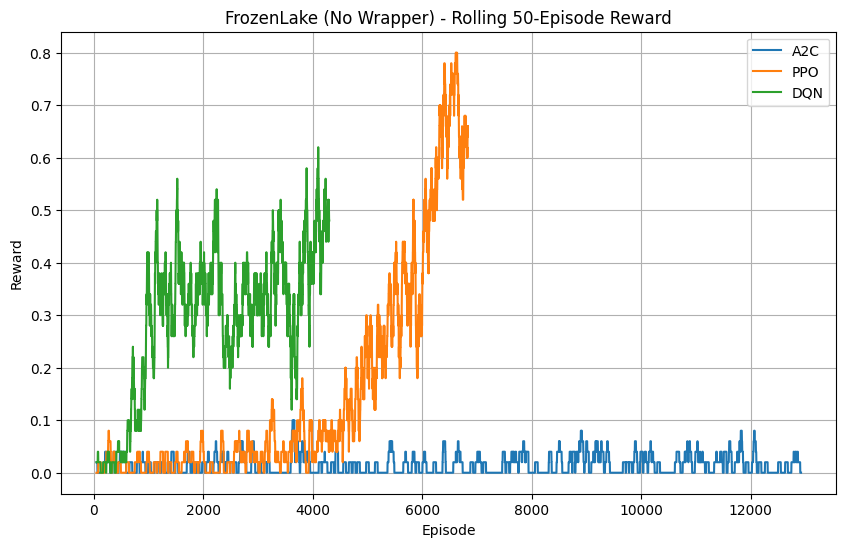

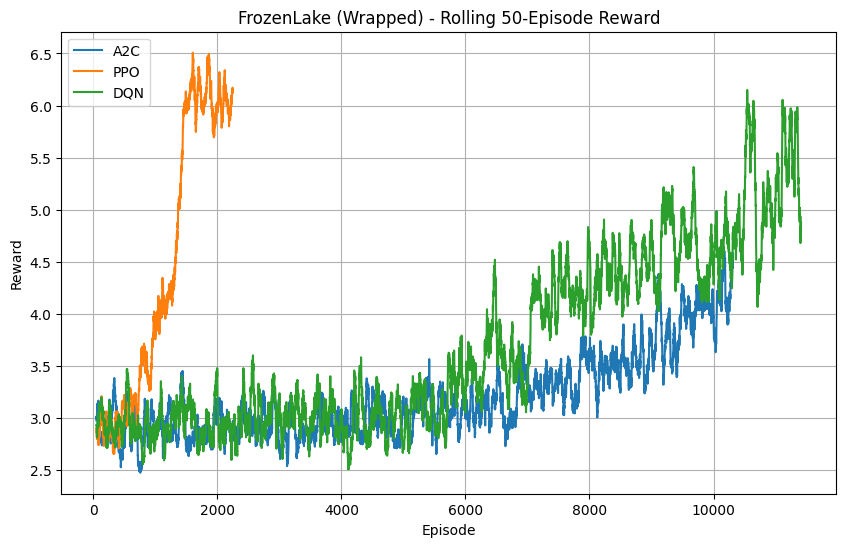

In [ ]:

########################################
# 2) Load Monitor Data from All Runs
########################################
all_data = {}  # Keys: (algo, mode) --> DataFrame
for algo in ALGOS:
    for mode in WRAP_MODES:
        log_dir = f"./logs_FrozenLake_{algo}_{mode}"
        if os.path.isdir(log_dir):
            try:
                df = load_monitor_csv(log_dir)
                all_data[(algo, mode)] = df
            except Exception as e:
                print(f"Could not load data for {algo} - {mode}: {e}")
        else:
            print(f"Directory not found: {log_dir}")

########################################
# 3) Plot Learning Curves (Rolling Average Reward)
########################################

# Figure 1: No Wrapper
plt.figure(figsize=(10, 6))
for algo in ALGOS:
    key = (algo, "no_wrap")
    if key in all_data:
        df = all_data[key]
        rolling_r = df["r"].rolling(ROLLING_WINDOW).mean()
        plt.plot(rolling_r, label=algo)
plt.title(f"FrozenLake (No Wrapper) - Rolling {ROLLING_WINDOW}-Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()

# Figure 2: Wrapped
plt.figure(figsize=(10, 6))
for algo in ALGOS:
    key = (algo, "wrapped")
    if key in all_data:
        df = all_data[key]
        rolling_r = df["r"].rolling(ROLLING_WINDOW).mean()
        plt.plot(rolling_r, label=algo)
plt.title(f"FrozenLake (Wrapped) - Rolling {ROLLING_WINDOW}-Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


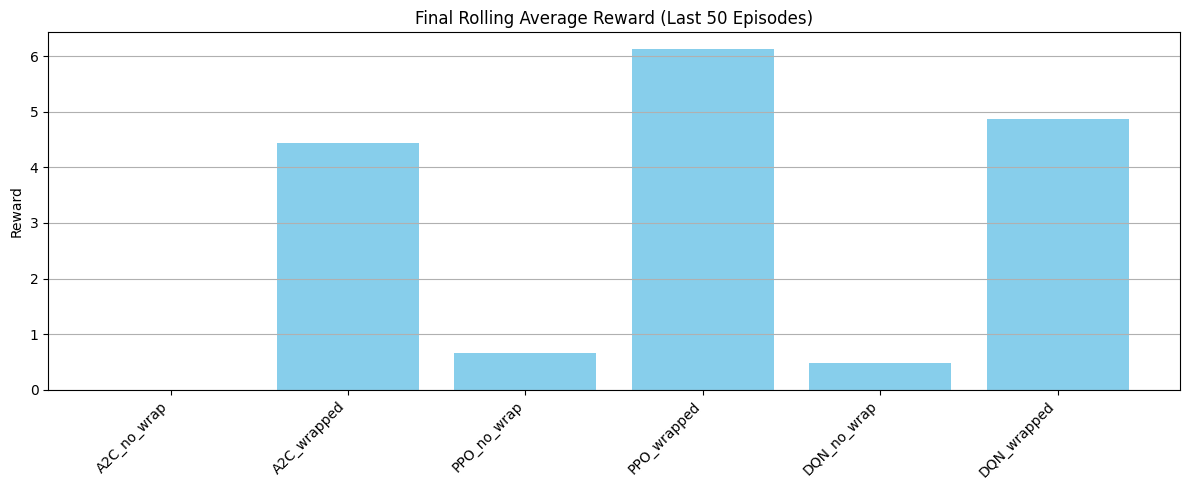

In [ ]:

########################################
# 4) Bar Chart: Final Rolling Average Reward
########################################
final_rewards = {}
for (algo, mode), df in all_data.items():
    rolling_r = df["r"].rolling(ROLLING_WINDOW).mean()
    # Get the last valid rolling average value
    final_val = rolling_r.dropna().iloc[-1] if not rolling_r.dropna().empty else float('nan')
    final_rewards[(algo, mode)] = final_val

labels = []
values = []
for algo in ALGOS:
    for mode in WRAP_MODES:
        key = (algo, mode)
        if key in final_rewards:
            labels.append(f"{algo}_{mode}")
            values.append(final_rewards[key])

plt.figure(figsize=(12, 5))
x = np.arange(len(labels))
plt.bar(x, values, color="skyblue")
plt.xticks(x, labels, rotation=45, ha="right")
plt.title(f"Final Rolling Average Reward (Last {ROLLING_WINDOW} Episodes)")
plt.ylabel("Reward")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


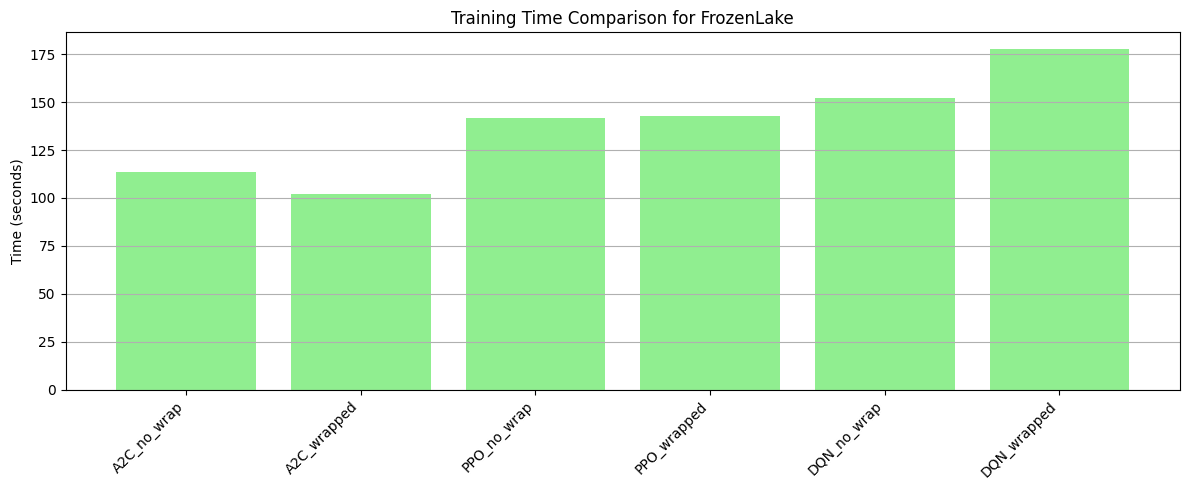

In [ ]:

########################################
# 5) Bar Chart: Training Times (if available)
########################################
if "training_times" in globals():
    time_labels = []
    time_values = []
    for algo in ALGOS:
        for mode in WRAP_MODES:
            key = (algo, mode)
            if key in training_times:
                time_labels.append(f"{algo}_{mode}")
                time_values.append(training_times[key])
    plt.figure(figsize=(12, 5))
    x = np.arange(len(time_labels))
    plt.bar(x, time_values, color="lightgreen")
    plt.xticks(x, time_labels, rotation=45, ha="right")
    plt.title("Training Time Comparison for FrozenLake")
    plt.ylabel("Time (seconds)")
    plt.grid(True, axis="y")
    plt.tight_layout()
    plt.show()
else:
    print("training_times dict not found; skipping training time plot.")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



=== Sample Efficiency (Episode Index when Rolling Reward >= Threshold) ===
Threshold = 0.0
A2C - no_wrap: reached threshold at episode 49.
A2C - wrapped: reached threshold at episode 49.
PPO - no_wrap: reached threshold at episode 49.
PPO - wrapped: reached threshold at episode 49.
DQN - no_wrap: reached threshold at episode 49.
DQN - wrapped: reached threshold at episode 49.


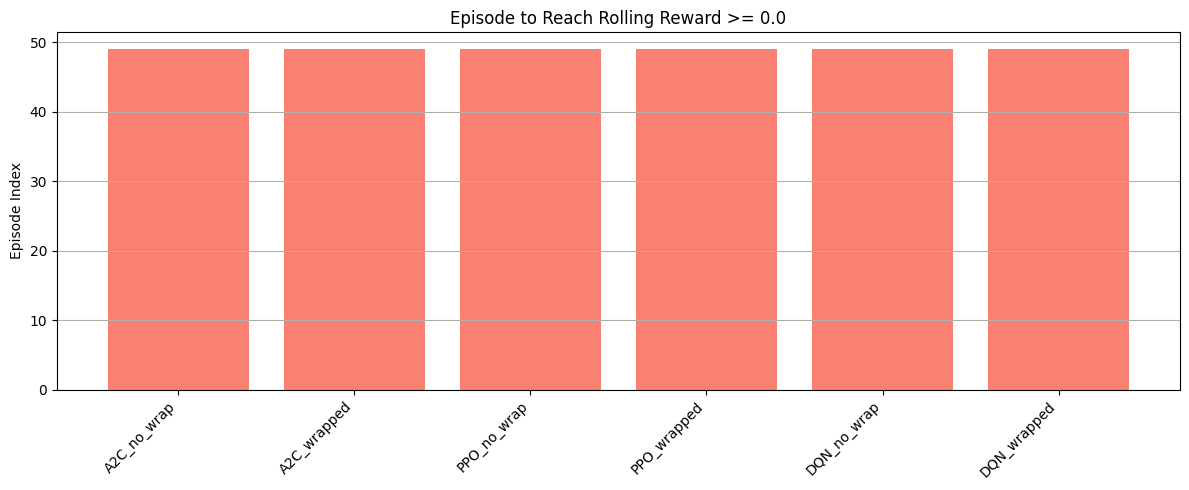

In [ ]:

########################################
# 6) Sample Efficiency: Episode to Reach Threshold
########################################
time_to_threshold = {}
for (algo, mode), df in all_data.items():
    ep_index = get_time_to_threshold(df, SUCCESS_THRESHOLD, ROLLING_WINDOW)
    time_to_threshold[(algo, mode)] = ep_index

print("\n=== Sample Efficiency (Episode Index when Rolling Reward >= Threshold) ===")
print(f"Threshold = {SUCCESS_THRESHOLD}")
for algo in ALGOS:
    for mode in WRAP_MODES:
        key = (algo, mode)
        val = time_to_threshold.get(key, None)
        if val is None:
            print(f"{algo} - {mode}: did NOT surpass threshold.")
        else:
            print(f"{algo} - {mode}: reached threshold at episode {val}.")

# Optional: Bar chart for time-to-threshold (only if some runs surpassed the threshold)
labels_thresh = []
values_thresh = []
for algo in ALGOS:
    for mode in WRAP_MODES:
        key = (algo, mode)
        ep = time_to_threshold.get(key, None)
        if ep is not None:
            labels_thresh.append(f"{algo}_{mode}")
            values_thresh.append(ep)

if len(values_thresh) > 0:
    plt.figure(figsize=(12, 5))
    x = np.arange(len(labels_thresh))
    plt.bar(x, values_thresh, color="salmon")
    plt.xticks(x, labels_thresh, rotation=45, ha="right")
    plt.title(f"Episode to Reach Rolling Reward >= {SUCCESS_THRESHOLD}")
    plt.ylabel("Episode Index")
    plt.grid(True, axis="y")
    plt.tight_layout()
    plt.show()
else:
    print("No runs surpassed the threshold; no bar chart for time-to-threshold.")


--- Testing A2C (no_wrap) ---
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


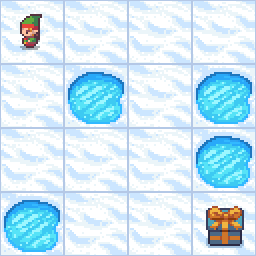



--- Testing A2C (wrapped) ---
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


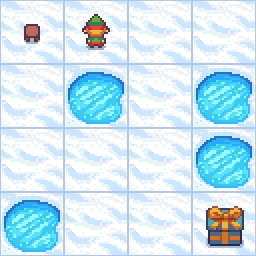



--- Testing PPO (no_wrap) ---
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


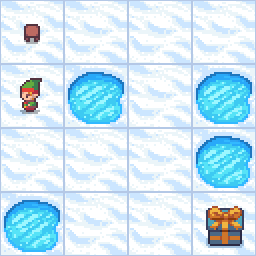



--- Testing PPO (wrapped) ---
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


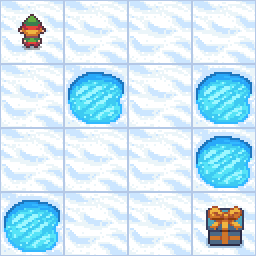



--- Testing DQN (no_wrap) ---
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


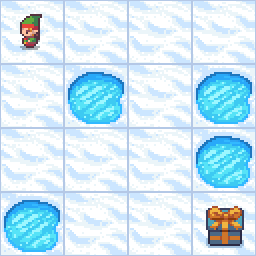



--- Testing DQN (wrapped) ---
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


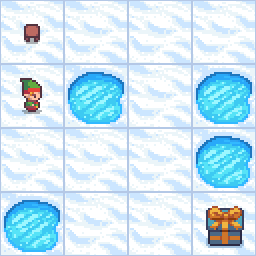

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

# List of algorithms and modes (assumed to be the same as during training)
ALGOS = ["A2C", "PPO", "DQN",
         #"QRDQN", "RecurrentPPO"
         ]
WRAP_MODES = ["no_wrap", "wrapped"]

for algo in ALGOS:
    for mode in WRAP_MODES:
        print(f"--- Testing {algo} ({mode}) ---")
        # Construct model path. For example: "./logs_FrozenLake_PPO_no_wrap/PPO_no_wrap_model"
        model_path = f"./logs_FrozenLake_{algo}_{mode}/{algo}_{mode}_model"

        # Create the FrozenLake environment with rgb_array rendering.
        # Use the helper function to create the environment.
        env = gym.make("FrozenLake-v1", render_mode="rgb_array")

        # If this model was trained with the wrapper, wrap the environment.
        if mode == "wrapped":
            # Assume FrozenLakePotentialWrapper is already defined.
            env = FrozenLakePotentialWrapper(env, gamma=0.99)

        # Load the trained model with the environment (so that it can perform prediction properly)
        model = model_classes[algo].load(model_path, env=env)

        # Initialize a list to store frames for the GIF.
        frames = []

        # Reset the environment
        obs, info = env.reset()
        # For FrozenLake, the observation is typically an integer; if it's batched, extract scalar.
        if isinstance(obs, np.ndarray) and obs.shape == (1,):
            obs = obs.item()

        done, truncated = False, False
        while not (done or truncated):
            # Model prediction expects a batched observation, so pass np.array([obs])
            action, _ = model.predict(np.array([obs]), deterministic=True)
            # Extract action if returned as an array
            if isinstance(action, np.ndarray):
                action = action.item()

            # Step the environment with the chosen action
            obs, reward, done, truncated, info = env.step(action)
            # Again, convert observation to scalar if needed.
            if isinstance(obs, np.ndarray) and obs.shape == (1,):
                obs = obs.item()

            # Render the current frame and store it
            frame = env.render()
            frames.append(frame)

        env.close()

        # Save the captured frames as a GIF
        gif_filename = f"{algo}_{mode}_frozenlake_test.gif"
        # Use duration=0.2 sec per frame (adjust as needed)
        imageio.mimsave(gif_filename, frames, duration=0.2)

        # Display the GIF inline
        display(Image(filename=gif_filename))
        print("\n")


# Thoughts on the Fitness of Supervised Learning (SL) for RL Problems and Its Limitations

In reinforcement learning (RL) tasks like Taxi-v3 or Frozen Lake, the goal is to learn an optimal policy from interaction with an environment, guided by reward signals rather than explicit labels. While supervised learning (SL) has proven highly effective for many tasks where large labeled datasets are available, its fitness for solving RL problems is limited. Here are some comprehensive thoughts and considerations:

---

## 1. **Nature of the Problem: Sequential Decision-Making vs. Static Mapping**

- **Sequential Dependencies:**  
  RL tasks require making a series of decisions where each action affects future states and rewards. In contrast, SL assumes that inputs and outputs are paired in an i.i.d. (independent and identically distributed) manner.  
  - *SL Limitation:* SL is not naturally equipped to handle long-term dependencies and the need for temporal credit assignment—determining which actions contributed to future rewards.

- **Exploration vs. Exploitation:**  
  RL algorithms must balance exploring new actions with exploiting known good actions, a challenge absent in SL.  
  - *SL Limitation:* Without a mechanism to explore, an SL model trained on a fixed dataset may perform well on that data but fail when encountering unseen or rare states.

---

## 2. **Data Availability and Quality**

- **Lack of Labeled Data:**  
  RL problems often do not provide explicit labels for what the “correct” action is in each state. Instead, the agent must learn from sparse and sometimes delayed reward signals.  
  - *SL Limitation:* Supervised learning relies on having abundant, accurately labeled data. In many RL tasks, such high-quality labels (or demonstrations) are not available, which limits the applicability of SL.

- **Distribution Shift:**  
  In RL, the data distribution can change as the agent explores different parts of the state space.  
  - *SL Limitation:* Models trained with SL on a fixed dataset can perform poorly if the underlying data distribution shifts—a common scenario in RL as the policy evolves.

---

## 3. **Credit Assignment Problem**

- **Delayed Rewards:**  
  Many RL environments provide rewards only at the end of an episode or after a sequence of actions. Determining which actions were responsible for success or failure is non-trivial.  
  - *SL Limitation:* SL lacks mechanisms for credit assignment over long time horizons because it typically focuses on immediate input-output mappings rather than cumulative outcomes.

---

## 4. **Generalization and Adaptability**

- **Dynamic Environments:**  
  RL environments are dynamic; the consequences of actions unfold over time, and the environment’s response can vary widely depending on the context.  
  - *SL Limitation:* Supervised learning models might overfit to the training distribution and fail to generalize to new states or adapt to changes in the environment dynamics.

- **Complex Policies:**  
  Optimal RL policies often require a level of nuance that goes beyond a simple classification or regression task.  
  - *SL Limitation:* SL methods may not capture the complex strategies needed for effective long-term planning and decision-making, especially in environments with high stochasticity or complexity.

---

## 5. **When Might SL Fail or Be Impractical?**

- **Sparse Reward Settings:**  
  In environments where rewards are sparse or heavily delayed, SL struggles because there isn’t enough direct feedback for correct actions. RL methods, by contrast, can propagate sparse rewards back through time using techniques like temporal-difference learning.

- **Exploration-Intensive Tasks:**  
  Tasks that require significant exploration to discover useful behaviors are not well-suited for SL because SL does not inherently encourage exploration beyond the provided training examples.

- **Adaptive and Changing Environments:**  
  If an environment is non-stationary (i.e., its dynamics change over time), a static SL model trained on historical data may become obsolete quickly. RL, with its continuous learning framework, is generally better at adapting to such changes.

---

While supervised learning excels in many applications with abundant labeled data and static mappings (e.g., image classification, speech recognition), its direct application to RL problems is limited due to:

- The need for sequential decision-making and temporal credit assignment.
- The challenge of learning from sparse, delayed rewards.
- Inherent issues with exploration and adaptability in dynamic environments.

Thus, for complex RL tasks like Taxi-v3 or Frozen Lake, methods specifically designed for reinforcement learning are generally more appropriate. They incorporate mechanisms for exploration, credit assignment, and online adaptation—features that supervised learning models lack.

In summary, SL is not ideally suited for RL problems because it cannot naturally handle the sequential, dynamic, and exploratory aspects of decision-making that are critical in RL. For these reasons, specialized RL techniques are necessary to effectively solve such tasks.


# **Task 2: Creating Custom Environment (45 points)**
In this question, you are required to model **a custom 4*4 gridworld problem** as Markov Decision Processes (MDPs). You must define the following components:



- **State Space ($ S $)**: The set of all possible states the agent can be in.
- **Action Space ($ A $)**: The set of all possible actions the agent can take.
- **Reward Function ($ R $)**: The reward the agent receives for taking an action in a given state.
- **Transition Probability ($ P $)**: The probability of transitioning to a new state given the current state and action. If the environment is deterministic, this can be omitted.

After defining the MDP components, implement problem using the **Gymnasium standard API**. Then, test the environments using various reinforcement learning algorithms (e.g., Q-Learning, DQN, PPO) and evaluate their performance.

=== Environment Visualization ===
Initial State (human mode):
A - - -
- X - -
- - X -
- - - G



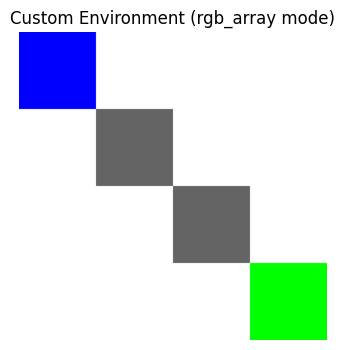

In [ ]:
import os
import time
import gymnasium as gym
from gymnasium import Env, spaces
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio
from stable_baselines3 import PPO, DQN
from stable_baselines3.common.monitor import Monitor
from IPython.display import Image, display

######################################################
# 1. Define and Visualize the Custom Environment
######################################################
class YourAwesomeEnvironment(Env):
    """
    A custom 4x4 GridWorld environment with obstacles.

    The agent starts at (0,0) and the goal is at (3,3).
    Blocked cells: (1,1) and (2,2) – the agent cannot enter these.

    Actions:
      0 = Up, 1 = Down, 2 = Left, 3 = Right.

    Rewards:
      +1 for reaching the goal, -0.1 per step.

    Render modes supported:
      - 'human': prints a text grid.
      - 'rgb_array': returns a NumPy array image.
    """
    metadata = {'render_modes': ['human', 'rgb_array']}

    def __init__(self):
        super(YourAwesomeEnvironment, self).__init__()
        self.grid_size = 4
        self.cell_size = 50  # For rgb_array rendering: each cell is 50x50 pixels

        # Define the action space and observation space.
        self.action_space = spaces.Discrete(4)
        # Observation: agent position as [row, col]
        self.observation_space = spaces.Box(low=0, high=self.grid_size - 1, shape=(2,), dtype=np.int32)

        # Define initial state, goal, and blocked cells.
        self.state = np.array([0, 0], dtype=np.int32)
        self.goal_state = np.array([self.grid_size - 1, self.grid_size - 1], dtype=np.int32)
        self.blocked_cells = [(1, 1), (2, 2)]

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.state = np.array([0, 0], dtype=np.int32)
        return self.state, {}

    def step(self, action):
        row, col = self.state
        # Compute candidate new position with boundaries.
        if action == 0:  # Up
            new_row = max(row - 1, 0)
            new_col = col
        elif action == 1:  # Down
            new_row = min(row + 1, self.grid_size - 1)
            new_col = col
        elif action == 2:  # Left
            new_row = row
            new_col = max(col - 1, 0)
        elif action == 3:  # Right
            new_row = row
            new_col = min(col + 1, self.grid_size - 1)
        else:
            raise ValueError("Invalid action")

        # If candidate cell is blocked, do not move.
        if (new_row, new_col) in self.blocked_cells:
            new_row, new_col = row, col

        self.state = np.array([new_row, new_col], dtype=np.int32)

        # Reward: +1 if goal reached, else -0.1 per step.
        if np.array_equal(self.state, self.goal_state):
            reward = 1.0
            done = True
        else:
            reward = -0.1
            done = False

        info = {}
        return self.state, reward, done, False, info

    def render(self, mode='human'):
        """
        Renders the current state.
        If mode=='human': prints a text grid.
        If mode=='rgb_array': returns an image as a NumPy array.
        Legend:
            A: Agent, G: Goal, X: Blocked, -: Empty
        """
        grid = np.full((self.grid_size, self.grid_size), '-', dtype='<U1')
        # Mark blocked cells.
        for (r, c) in self.blocked_cells:
            grid[r, c] = 'X'
        # Mark goal.
        grid[self.goal_state[0], self.goal_state[1]] = 'G'
        # Mark agent.
        grid[self.state[0], self.state[1]] = 'A'

        if mode == 'human':
            for row in grid:
                print(" ".join(row))
            print()
            return None
        elif mode == 'rgb_array':
            img_height = self.grid_size * self.cell_size
            img_width = self.grid_size * self.cell_size
            img = np.ones((img_height, img_width, 3), dtype=np.uint8) * 255  # white background

            # Define colors.
            colors = {
                'empty': (255, 255, 255),    # white
                'blocked': (100, 100, 100),  # gray
                'agent': (0, 0, 255),        # blue
                'goal': (0, 255, 0)          # green
            }

            for r in range(self.grid_size):
                for c in range(self.grid_size):
                    if (r, c) in self.blocked_cells:
                        cell_color = colors['blocked']
                    elif (r, c) == (self.goal_state[0], self.goal_state[1]):
                        cell_color = colors['goal']
                    else:
                        cell_color = colors['empty']
                    if (r, c) == (self.state[0], self.state[1]):
                        cell_color = colors['agent']
                    r_start = r * self.cell_size
                    r_end = r_start + self.cell_size
                    c_start = c * self.cell_size
                    c_end = c_start + self.cell_size
                    img[r_start:r_end, c_start:c_end, :] = cell_color
            return img
        else:
            raise ValueError("Unsupported render mode. Use 'human' or 'rgb_array'.")

    def close(self):
        pass


# -----------------------------
# Visualize the Environment (Part 1)
# -----------------------------
if __name__ == "__main__":
    print("=== Environment Visualization ===")
    env = YourAwesomeEnvironment()
    state, _ = env.reset()
    print("Initial State (human mode):")
    env.render(mode='human')  # Print text-based grid

    # Visualize with rgb_array mode and display with matplotlib
    frame = env.render(mode='rgb_array')
    plt.figure(figsize=(4, 4))
    plt.imshow(frame)
    plt.title("Custom Environment (rgb_array mode)")
    plt.axis("off")
    plt.show()

In [ ]:

######################################################
# 2. Training Setup: Model Classes, Hyperparameters, and Helper Functions
######################################################
# Define RL algorithms to compare.
model_classes = {
    "PPO": PPO,
    "DQN": DQN,
}

# Hyperparameters (feel free to tune these)
model_hyperparams = {
    "PPO": {
        "verbose": 1,
        "policy": "MlpPolicy",
        "learning_rate": 2.5e-4,
        "n_steps": 128,
        "batch_size": 64,
        "n_epochs": 4,
    },
    "DQN": {
        "verbose": 1,
        "policy": "MlpPolicy",
        "learning_rate": 1e-3,
        "buffer_size": 50000,
        "learning_starts": 1000,
        "train_freq": 4,
    },
}

# Total training timesteps (adjust as needed)
N_TIMESTEPS = 100_000


# Dictionaries to store training times and log directories.
training_times = {}
monitor_dirs = {}

def make_custom_env():
    """
    Returns an instance of the custom environment.
    """
    env = YourAwesomeEnvironment()
    return env


In [ ]:

######################################################
# 3. Training Loop for PPO and DQN on the Custom Environment
######################################################
for algo_name, algo_class in model_classes.items():
    # Create logging directory (e.g., "./logs_CustomEnv_PPO")
    log_dir = f"./logs_CustomEnv_{algo_name}"
    os.makedirs(log_dir, exist_ok=True)

    # Create the custom environment and wrap with Monitor.
    env = make_custom_env()
    env_monitored = Monitor(env, log_dir)

    # Pull hyperparameters and extract the policy.
    hyperparams = model_hyperparams.get(algo_name, {}).copy()
    policy = hyperparams.pop("policy", "MlpPolicy")

    # Instantiate the model.
    model = algo_class(policy=policy, env=env_monitored, **hyperparams)

    start_time = time.time()
    model.learn(total_timesteps=N_TIMESTEPS)
    elapsed = time.time() - start_time
    training_times[(algo_name, "custom")] = elapsed
    monitor_dirs[(algo_name, "custom")] = log_dir

    print(f"{algo_name} finished training in {elapsed:.2f} seconds.")
    print("_" * 50)

    # Save the trained model.
    model.save(os.path.join(log_dir, f"{algo_name}_custom_model"))
    env_monitored.close()
    hyperparams["policy"] = policy  # Restore if needed


Streaming output truncated to the last 5000 lines.
|    loss             | 6.19e-06 |
|    n_updates        | 22650    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.3      |
|    ep_rew_mean      | 0.47     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9372     |
|    fps              | 640      |
|    time_elapsed     | 142      |
|    total_timesteps  | 91626    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 3.04e-06 |
|    n_updates        | 22656    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.3      |
|    ep_rew_mean      | 0.47     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 9376     |
|    fps              | 640      |
|    time_elapsed     | 143      |
|   

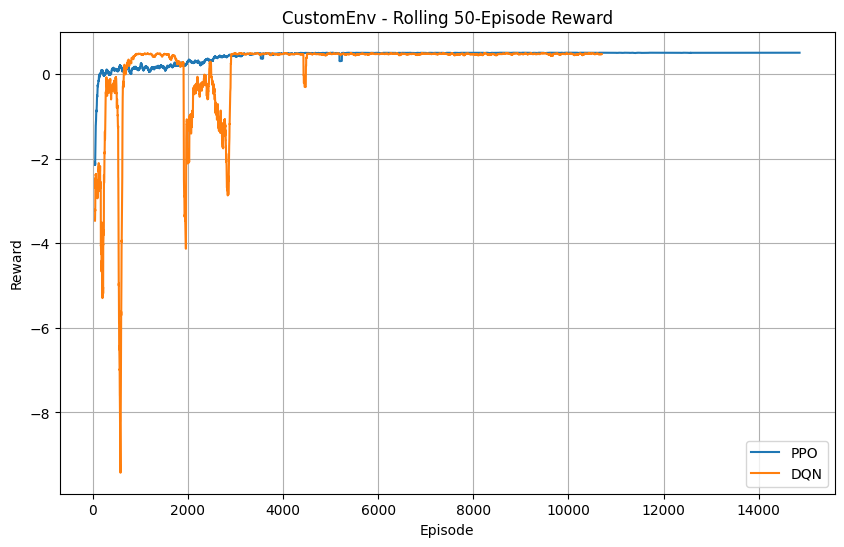

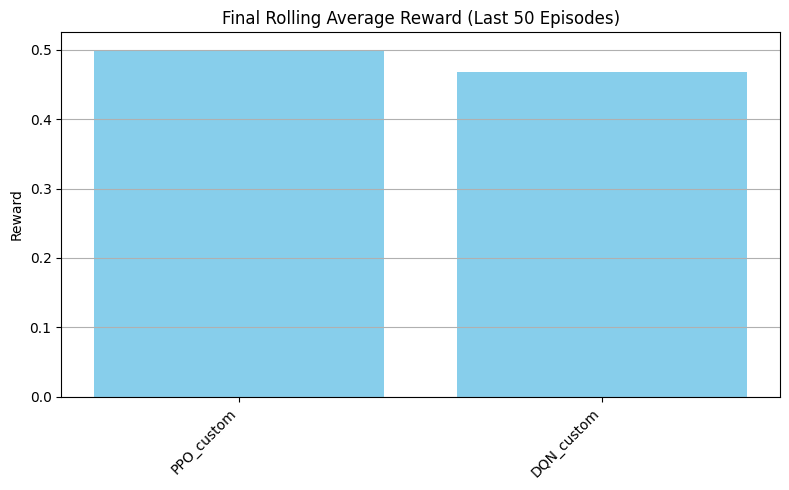

In [ ]:

######################################################
# 4. Analysis: Load Monitor Data and Plot Comparisons
######################################################
ROLLING_WINDOW = 50   # Smoothing window
SUCCESS_THRESHOLD = 0.0  # threshold

def load_monitor_csv(log_dir):
    monitor_files = [f for f in os.listdir(log_dir) if f.startswith("monitor") and f.endswith(".csv")]
    if not monitor_files:
        raise FileNotFoundError(f"No monitor CSV found in {log_dir}")
    csv_path = os.path.join(log_dir, monitor_files[0])
    df = pd.read_csv(csv_path, skiprows=1)
    return df

def get_time_to_threshold(df, threshold, window):
    rolling_r = df["r"].rolling(window).mean()
    meets = rolling_r[rolling_r >= threshold]
    return meets.index[0] if not meets.empty else None

all_data = {}
for (algo, mode) in monitor_dirs:
    log_dir = monitor_dirs[(algo, mode)]
    try:
        df = load_monitor_csv(log_dir)
        all_data[(algo, mode)] = df
    except Exception as e:
        print(f"Could not load data for {algo}: {e}")

# Plot rolling average reward curves.
plt.figure(figsize=(10, 6))
for (algo, mode), df in all_data.items():
    rolling_r = df["r"].rolling(ROLLING_WINDOW).mean()
    plt.plot(rolling_r, label=algo)
plt.title(f"CustomEnv - Rolling {ROLLING_WINDOW}-Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()
plt.grid(True)
plt.show()

# Bar chart: Final rolling average reward.
final_rewards = {}
for (algo, mode), df in all_data.items():
    rolling_r = df["r"].rolling(ROLLING_WINDOW).mean().dropna()
    final_rewards[(algo, mode)] = rolling_r.iloc[-1] if not rolling_r.empty else np.nan

labels = []
values = []
for (algo, mode), reward in final_rewards.items():
    labels.append(f"{algo}_{mode}")
    values.append(reward)

plt.figure(figsize=(8, 5))
x = np.arange(len(labels))
plt.bar(x, values, color="skyblue")
plt.xticks(x, labels, rotation=45, ha="right")
plt.title(f"Final Rolling Average Reward (Last {ROLLING_WINDOW} Episodes)")
plt.ylabel("Reward")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

In [ ]:

# Bar chart: Training times.
time_labels = []
time_values = []
for (algo, mode), t in training_times.items():
    time_labels.append(f"{algo}_{mode}")
    time_values.append(t)

plt.figure(figsize=(8, 5))
x = np.arange(len(time_labels))
plt.bar(x, time_values, color="lightgreen")
plt.xticks(x, time_labels, rotation=45, ha="right")
plt.title("Training Time Comparison (seconds)")
plt.ylabel("Time (s)")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

# Sample Efficiency: Episode index when rolling reward >= threshold.
time_to_threshold = {}
for (algo, mode), df in all_data.items():
    ep_index = get_time_to_threshold(df, SUCCESS_THRESHOLD, ROLLING_WINDOW)
    time_to_threshold[(algo, mode)] = ep_index

print("\n=== Sample Efficiency ===")
print(f"Threshold = {SUCCESS_THRESHOLD}")
for (algo, mode), ep in time_to_threshold.items():
    if ep is None:
        print(f"{algo}_{mode}: did NOT surpass threshold.")
    else:
        print(f"{algo}_{mode}: reached threshold at episode {ep}.")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



=== Sample Efficiency ===
Threshold = 0.0
PPO_custom: reached threshold at episode 158.
DQN_custom: reached threshold at episode 654.


--- Testing PPO ---
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Saved test GIF for PPO as PPO_customenv_test.gif


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


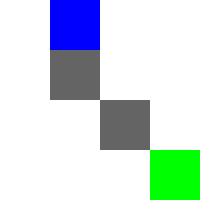



--- Testing DQN ---
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Saved test GIF for DQN as DQN_customenv_test.gif


In [ ]:
# -----------------------------
# 5. Testing and Visualizing Trained Models (Generate GIFs)
# -----------------------------
for algo in model_classes.keys():
    print(f"--- Testing {algo} ---")
    # Construct model path.
    log_dir = f"./logs_CustomEnv_{algo}"
    model_path = os.path.join(log_dir, f"{algo}_custom_model")

    # Create an instance of the environment with rgb_array rendering.
    test_env = YourAwesomeEnvironment()

    # Load the trained model.
    model = model_classes[algo].load(model_path, env=test_env)

    frames = []
    obs, _ = test_env.reset()
    done = False
    max_test_steps = 100  # Safeguard: break if test runs too long.
    step_count = 0

    while not done and step_count < max_test_steps:
        # Model prediction expects a batch dimension.
        action, _ = model.predict(np.array([obs]), deterministic=True)
        if isinstance(action, np.ndarray):
            action = action.item()
        obs, reward, done, truncated, info = test_env.step(action)
        frame = test_env.render(mode='rgb_array')
        frames.append(frame)
        step_count += 1
        if truncated:
            break

    test_env.close()
    gif_filename = f"{algo}_customenv_test.gif"
    imageio.mimsave(gif_filename, frames, duration=0.2)
    print(f"Saved test GIF for {algo} as {gif_filename}")
    display(Image(filename=gif_filename))
    print("\n")


# **Task 3: Pygame 🎮 Tutorial & Custom RL Environment (Bonus)**

In this bonus task, you will implement a custom RL environment using Pygame and make it Gym-compatible for training an RL agent. Pygame is widely used for 2D game development and can be an excellent tool for creating custom RL environments. You will start by learning basic Pygame concepts (game loop, rendering, input handling), then implement a simple grid-based environment where an agent moves toward a goal while avoiding obstacles. Finally, you will train an RL agent using Stable-Baselines3 (SB3) to solve the environment. If you’re looking for inspiration, consider recreating the Chrome Dino game 🦖 as an RL environment which will be introduced at workshop or future TA sessions, but feel free to explore your own ideas!

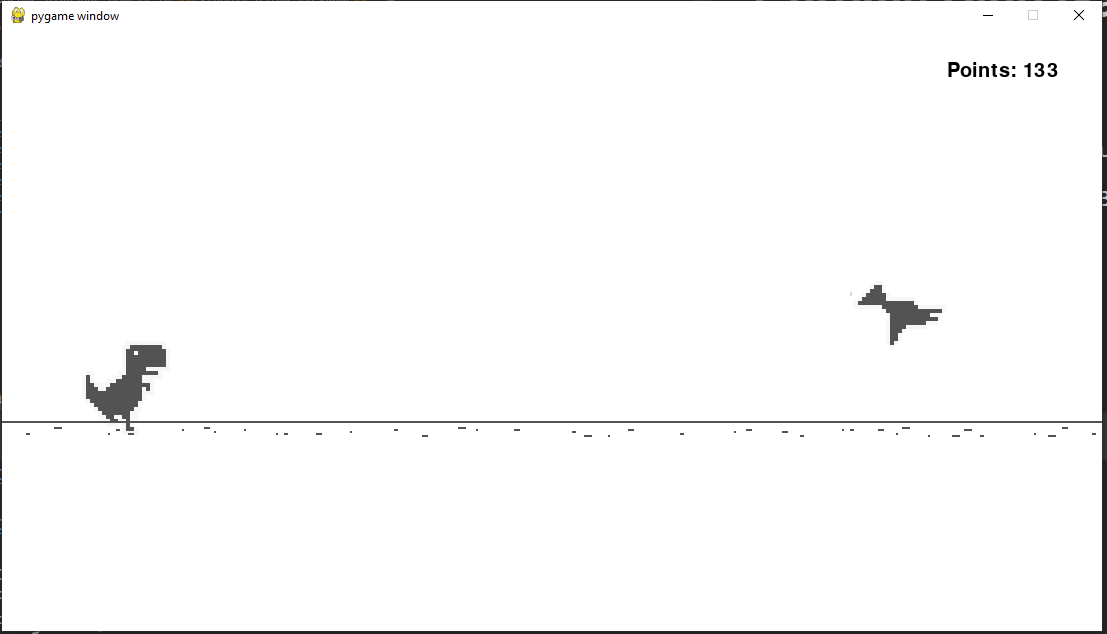

# Dino RL Environment Setup

This cell sets up the custom Dino game environment for our RL assignment. It includes:
- **Import Statements:** Essential libraries (Pygame, Gymnasium, imageio, etc.) for game rendering, environment interfacing, and image handling.
- **Game Object Classes:** Definitions for game components (Dinosaur, Cloud, Obstacles, etc.) that represent the various entities in the game.
- **Environment Class (`DinoEnv`):** A Gymnasium-compatible RL environment that wraps the Dino game. It defines the observation and action spaces, game dynamics, rendering (both interactive and frame capture for GIF creation), and reset/step methods.

This cell provides the foundational framework needed to train and test RL agents on the Dino game.


pygame 2.1.0 (SDL 2.0.16, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html
Environment reset!
Starting demo episode. Watch the Pygame window for the game!
Action taken: RUN
Score: 1, Dino Y-pos: 310, Game Speed: 10
Action taken: JUMP
Score: 2, Dino Y-pos: 276, Game Speed: 10
Action taken: RUN
Score: 3, Dino Y-pos: 310, Game Speed: 10
Action taken: DUCK
Score: 4, Dino Y-pos: 340, Game Speed: 10
Action taken: RUN
Score: 5, Dino Y-pos: 310, Game Speed: 10
Action taken: JUMP
Score: 6, Dino Y-pos: 279, Game Speed: 10
Action taken: RUN
Score: 7, Dino Y-pos: 310, Game Speed: 10
Action taken: DUCK
Score: 8, Dino Y-pos: 340, Game Speed: 10
Action taken: RUN
Score: 9, Dino Y-pos: 310, Game Speed: 10
Action taken: JUMP
Score: 10, Dino Y-pos: 282, Game Speed: 10
Action taken: RUN
Score: 11, Dino Y-pos: 310, Game Speed: 10
Action taken: DUCK
Score: 12, Dino Y-pos: 340, Game Speed: 10
Action taken: RUN
Score: 13, Dino Y-pos: 310, Game Speed: 10
Action taken: JUM

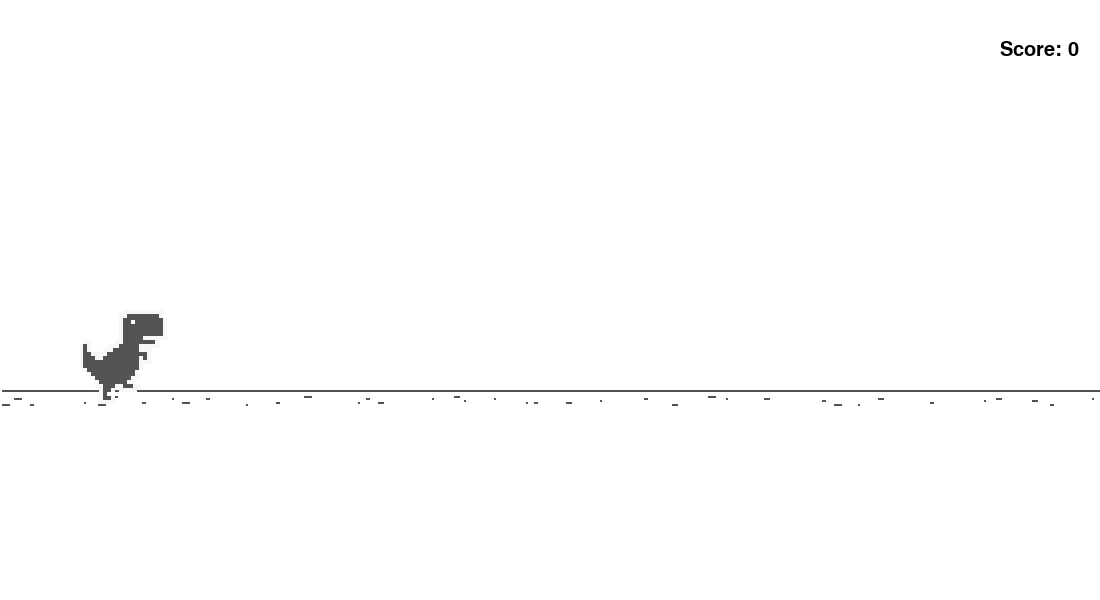

In [ ]:
# Environment Demonstration

This cell demonstrates the usage of the `DinoEnv`:
- It creates an instance of the environment.
- Runs a short demo episode using a preset action sequence.
- Renders the game and saves the episode as a GIF.

This demo helps verify that the environment behaves as expected before moving on to training.
import os
import random
import numpy as np
import pygame
import imageio
import gymnasium as gym
from gymnasium import spaces
from gymnasium.utils import seeding
from IPython.display import Image, display
import time

# --------------------------
# Game Object Classes (unchanged)
# --------------------------
class Dinosaur:
    X_POS = 80
    Y_POS = 310
    Y_POS_DUCK = 340
    JUMP_VEL = 8.5

    def __init__(self, run_img, jump_img, duck_img):
        self.run_img = run_img
        self.jump_img = jump_img
        self.duck_img = duck_img
        self.reset()

    def reset(self):
        self.dino_duck = False
        self.dino_run = True
        self.dino_jump = False
        self.step_index = 0
        self.jump_vel = self.JUMP_VEL
        self.image = self.run_img[0]
        self.rect = self.image.get_rect()
        self.rect.x = self.X_POS
        self.rect.y = self.Y_POS

    def start_jump(self):
        if not self.dino_jump:
            self.dino_jump = True
            self.dino_run = False
            self.dino_duck = False

    def start_duck(self):
        if not self.dino_jump:
            self.dino_duck = True
            self.dino_run = False
            self.dino_jump = False

    def run(self):
        self.dino_run = True
        self.dino_duck = False
        self.dino_jump = False

    def update(self):
        if self.dino_jump:
            self._jump()
        elif self.dino_duck:
            self._duck()
        elif self.dino_run:
            self._run_animation()

    def _run_animation(self):
        self.image = self.run_img[(self.step_index // 5) % len(self.run_img)]
        self.rect = self.image.get_rect()
        self.rect.x = self.X_POS
        self.rect.y = self.Y_POS
        self.step_index = (self.step_index + 1) % 10

    def _duck(self):
        self.image = self.duck_img[(self.step_index // 5) % len(self.duck_img)]
        self.rect = self.image.get_rect()
        self.rect.x = self.X_POS
        self.rect.y = self.Y_POS_DUCK
        self.step_index = (self.step_index + 1) % 10

    def _jump(self):
        self.image = self.jump_img
        if self.dino_jump:
            self.rect.y -= self.jump_vel * 4
            self.jump_vel -= 0.8
        if self.jump_vel < -self.JUMP_VEL:
            self.dino_jump = False
            self.jump_vel = self.JUMP_VEL

    def draw(self, screen):
        screen.blit(self.image, (self.rect.x, self.rect.y))


class Cloud:
    def __init__(self, image, screen_width):
        self.image = image
        self.screen_width = screen_width
        self.reset()

    def reset(self):
        self.x = self.screen_width + random.randint(800, 1000)
        self.y = random.randint(50, 100)
        self.width = self.image.get_width()

    def update(self, game_speed):
        self.x -= game_speed
        if self.x < -self.width:
            self.x = self.screen_width + random.randint(2500, 3000)
            self.y = random.randint(50, 100)

    def draw(self, screen):
        screen.blit(self.image, (self.x, self.y))


class Obstacle:
    def __init__(self, image_list, x_init):
        self.image_list = image_list
        self.type = 0
        self.image = self.image_list[self.type]
        self.rect = self.image.get_rect()
        self.rect.x = x_init

    def update(self, game_speed):
        self.rect.x -= game_speed

    def draw(self, screen):
        screen.blit(self.image, self.rect)


class SmallCactus(Obstacle):
    def __init__(self, image_list, x_init):
        super().__init__(image_list, x_init)
        self.type = random.randint(0, len(image_list)-1)
        self.image = image_list[self.type]
        self.rect = self.image.get_rect()
        self.rect.x = x_init
        self.rect.y = 325


class LargeCactus(Obstacle):
    def __init__(self, image_list, x_init):
        super().__init__(image_list, x_init)
        self.type = random.randint(0, len(image_list)-1)
        self.image = image_list[self.type]
        self.rect = self.image.get_rect()
        self.rect.x = x_init
        self.rect.y = 300


class Bird(Obstacle):
    def __init__(self, image_list, x_init):
        super().__init__(image_list, x_init)
        self.rect.y = 250
        self.index = 0

    def draw(self, screen):
        self.index = (self.index + 1) % 10
        self.image = self.image_list[(self.index // 5) % len(self.image_list)]
        screen.blit(self.image, self.rect)

# --------------------------
# Gymnasium Environment Definition
# --------------------------

class DinoEnv(gym.Env):
    """
    Gymnasium-compatible environment for the Dino game using Pygame.
    Actions:
        0 - Run (no-op)
        1 - Jump
        2 - Duck
    Observation:
        An RGB image (height x width x 3) of the game screen.
    """
    metadata = {"render_modes": ["human", "rgb_array"]}

    def __init__(self):
        super(DinoEnv, self).__init__()
        self.screen_width = 1100
        self.screen_height = 600

        self.observation_space = spaces.Box(low=0, high=255,
                                            shape=(600, 1100, 3),
                                            dtype=np.uint8)
        self.action_space = spaces.Discrete(3)

        pygame.init()
        self.screen = pygame.display.set_mode((self.screen_width, self.screen_height))
        pygame.display.set_caption("Dino RL Environment")
        self.clock = pygame.time.Clock()

        self.RUNNING = [pygame.image.load(os.path.join("Assets", "Dino", "DinoRun1.png")),
                        pygame.image.load(os.path.join("Assets", "Dino", "DinoRun2.png"))]
        self.JUMPING = pygame.image.load(os.path.join("Assets", "Dino", "DinoJump.png"))
        self.DUCKING = [pygame.image.load(os.path.join("Assets", "Dino", "DinoDuck1.png")),
                        pygame.image.load(os.path.join("Assets", "Dino", "DinoDuck2.png"))]
        self.SMALL_CACTUS = [pygame.image.load(os.path.join("Assets", "Cactus", "SmallCactus1.png")),
                             pygame.image.load(os.path.join("Assets", "Cactus", "SmallCactus2.png")),
                             pygame.image.load(os.path.join("Assets", "Cactus", "SmallCactus3.png"))]
        self.LARGE_CACTUS = [pygame.image.load(os.path.join("Assets", "Cactus", "LargeCactus1.png")),
                             pygame.image.load(os.path.join("Assets", "Cactus", "LargeCactus2.png")),
                             pygame.image.load(os.path.join("Assets", "Cactus", "LargeCactus3.png"))]
        self.BIRD = [pygame.image.load(os.path.join("Assets", "Bird", "Bird1.png")),
                     pygame.image.load(os.path.join("Assets", "Bird", "Bird2.png"))]
        self.CLOUD = pygame.image.load(os.path.join("Assets", "Other", "Cloud.png"))
        self.BG = pygame.image.load(os.path.join("Assets", "Other", "Track.png"))

        self.game_speed = 10
        self.x_pos_bg = 0
        self.y_pos_bg = 380
        self.score = 0
        self.done = False

        self.dino = Dinosaur(self.RUNNING, self.JUMPING, self.DUCKING)
        self.obstacles = []
        self.cloud = Cloud(self.CLOUD, self.screen_width)
        self.frames = []

        self.seed()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self, seed=None, options=None):
        if seed is not None:
            self.seed(seed)
        # You can process options if needed; for now we ignore them.
        self.game_speed = 10
        self.x_pos_bg = 0
        self.score = 0
        self.done = False
        self.dino.reset()
        self.obstacles = []
        self.cloud.reset()
        self.frames = []  # clear recorded frames
        obs = self.render(mode="rgb_array")
        print("Environment reset!")
        return obs, {}




    def step(self, action,show_detail = False):
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                self.close()

        action_name = {0: "RUN", 1: "JUMP", 2: "DUCK"}.get(action, "UNKNOWN")
        if show_detail:
            print(f"Action taken: {action_name}")

        if action == 1:
            self.dino.start_jump()
        elif action == 2:
            self.dino.start_duck()
        else:
            self.dino.run()

        self.dino.update()
        self.cloud.update(self.game_speed)

        if len(self.obstacles) == 0:
            choice = random.randint(0, 2)
            if choice == 0:
                self.obstacles.append(SmallCactus(self.SMALL_CACTUS, self.screen_width))
            elif choice == 1:
                self.obstacles.append(LargeCactus(self.LARGE_CACTUS, self.screen_width))
            else:
                self.obstacles.append(Bird(self.BIRD, self.screen_width))

        reward = 1
        for obstacle in self.obstacles:
            obstacle.update(self.game_speed)
            if self.dino.rect.colliderect(obstacle.rect):
                reward = -100
                self.done = True
                if show_detail:
                    print("Collision detected!")
                break

        self.obstacles = [obs for obs in self.obstacles if obs.rect.x + obs.rect.width > 0]

        self.x_pos_bg -= self.game_speed
        if self.x_pos_bg <= -self.BG.get_width():
            self.x_pos_bg = 0

        self.score += 1
        if self.score % 100 == 0:
            self.game_speed += 1

        self.render(mode="rgb_array")
        if show_detail:
            print(f"Score: {self.score}, Dino Y-pos: {self.dino.rect.y}, Game Speed: {self.game_speed}")
        obs = self._get_obs()
        info = {"score": self.score}
        return obs, reward, self.done, False, info


    def _get_obs(self):
        obs = pygame.surfarray.array3d(self.screen)
        obs = np.transpose(obs, (1, 0, 2))
        return obs

    def render(self, mode="human"):
        self.screen.fill((255, 255, 255))
        self.screen.blit(self.BG, (self.x_pos_bg, self.y_pos_bg))
        self.screen.blit(self.BG, (self.BG.get_width() + self.x_pos_bg, self.y_pos_bg))
        self.cloud.draw(self.screen)
        self.dino.draw(self.screen)
        for obstacle in self.obstacles:
            obstacle.draw(self.screen)
        font = pygame.font.Font(None, 30)
        score_text = font.render("Score: " + str(self.score), True, (0, 0, 0))
        self.screen.blit(score_text, (1000, 40))
        pygame.display.flip()
        self.clock.tick(30)
        if mode == "rgb_array":
            obs = self._get_obs()
            self.frames.append(obs)
            return obs

    def close(self):
        pygame.quit()

    def save_gif(self, filename="gameplay.gif", fps=30):
        imageio.mimsave(filename, self.frames, fps=fps)
        print(f"Saved GIF as {filename}")

# --------------------------
# Demonstration: Running the Environment
# --------------------------
if __name__ == '__main__':
    env = DinoEnv()
    obs, _ = env.reset()
    total_reward = 0
    done = False
    action_sequence = [0, 1, 0, 2]
    action_index = 0
    print("Starting demo episode. Watch the Pygame window for the game!")
    while not done:
        action = action_sequence[action_index % len(action_sequence)]
        action_index += 1
        obs, reward, done,_, info = env.step(action,show_detail=True)
        total_reward += reward
        time.sleep(0.1)
    print("Episode finished. Total reward:", total_reward)
    env.save_gif("dino_game.gif")
    env.close()
    display(Image(filename="dino_game.gif"))


# Environment Demonstration

This cell demonstrates the usage of the `DinoEnv`:
- It creates an instance of the environment.
- Runs a short demo episode using a preset action sequence.
- Renders the game and saves the episode as a GIF.

This demo helps verify that the environment behaves as expected before moving on to training.


Environment reset!


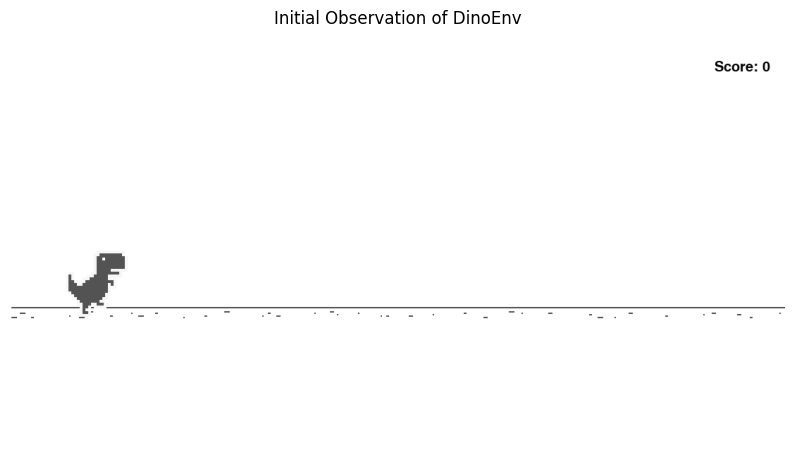

🔹 Observation Space: Box(0, 255, (600, 1100, 3), uint8)
🔹 Action Space: Discrete(3)
🔹 Observation Space Shape: (600, 1100, 3)
🔹 Number of Possible Actions: 3

🔹 Action Mapping:
   0: RUN (No-op)
   1: JUMP
   2: DUCK

🔹 Note: DinoEnv is based on visual observations and does not expose a discrete transition model.


In [ ]:
import matplotlib.pyplot as plt
import gymnasium as gym


env = DinoEnv()


obs = env.reset()

# Render and display the initial state
frame = env.render(mode="rgb_array")
plt.figure(figsize=(10, 6))
plt.imshow(frame)
plt.axis("off")
plt.title("Initial Observation of DinoEnv")
plt.show()

# Print core environment details
print("🔹 Observation Space:", env.observation_space)
print("🔹 Action Space:", env.action_space)
print("🔹 Observation Space Shape:", env.observation_space.shape)
print("🔹 Number of Possible Actions:", env.action_space.n)

# Define an action mapping for readability
action_mapping = {
    0: "RUN (No-op)",
    1: "JUMP",
    2: "DUCK"
}

print("\n🔹 Action Mapping:")
for key, value in action_mapping.items():
    print(f"   {key}: {value}")

# Since DinoEnv uses visual observations and continuous dynamics,
# there is no discrete transition structure to inspect.
print("\n🔹 Note: DinoEnv is based on visual observations and does not expose a discrete transition model.")

# Close the environment when done
env.close()


In [ ]:
!pip install sb3_contrib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Training with PPO and A2C

In this cell, we train RL agents on the Dino environment using two algorithms: **PPO** and **A2C**.
- Each agent is trained for a fixed number of timesteps.
- Training logs and models are saved for later analysis and comparison.
- This setup allows us to later compare learning curves, sample efficiency, and overall performance.

This cell sets up the training loop and logs key metrics.


In [ ]:
import os
import time
import gymnasium as gym  # or use 'import gym' if using classic Gym
import matplotlib.pyplot as plt
import pandas as pd
from stable_baselines3 import PPO, A2C
from stable_baselines3.common.monitor import Monitor


model_classes = {
    "PPO": PPO,
    "A2C": A2C,
}

# Hyperparameters for each algorithm using "CnnPolicy"
model_hyperparams = {
    "PPO": {
        "policy": "CnnPolicy",
        "learning_rate": 0.0003,
        "n_steps": 128,
        "batch_size": 64,
        "n_epochs": 4,
        "gamma": 0.99,
        "clip_range": 0.2,
        "verbose": 1,
    },
    "A2C": {
        "policy": "CnnPolicy",
        "learning_rate": 0.0007,
        "n_steps": 5,
        "gamma": 0.99,
        "verbose": 1,
    },
}


N_TIMESTEPS = 5_000


training_times = {}
monitor_dirs = {}    # log folders for each algorithm
model_paths = {}     # saved model paths


for algo_name, algo_class in model_classes.items():
    print(f"\n==================== Training {algo_name} ====================")
    # Create directory for logs and models
    log_dir = f"./logs_dino_{algo_name}"
    os.makedirs(log_dir, exist_ok=True)
    monitor_dirs[algo_name] = log_dir


    env = DinoEnv()
    env_mon = Monitor(env, log_dir)


    hyperparams = model_hyperparams[algo_name].copy()
    policy = hyperparams.pop("policy")


    model = algo_class(policy, env_mon, **hyperparams)

    print(f"Training {algo_name} on DinoEnv for {N_TIMESTEPS} timesteps...")
    start_time = time.time()
    model.learn(total_timesteps=N_TIMESTEPS)
    elapsed = time.time() - start_time
    training_times[algo_name] = elapsed
    print(f"{algo_name} training completed in {elapsed:.2f} seconds.")

    # Save the trained model
    model_save_path = os.path.join(log_dir, f"{algo_name}_dino_model")
    model.save(model_save_path)
    model_paths[algo_name] = model_save_path
    print(f"Saved {algo_name} model to {model_save_path}")

    # Close the monitored environment and free memory
    env_mon.close()
    del model


==================== Training PPO ====================
Using cpu device
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Training PPO on DinoEnv for 5000 timesteps...
Environment reset!
Environment reset!
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 94       |
|    ep_rew_mean     | -7       |
| time/              |          |
|    fps             | 8        |
|    iterations      | 1        |
|    time_elapsed    | 15       |
|    total_timesteps | 128      |
---------------------------------
Environment reset!
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 92.5      |
|    ep_rew_mean          | -8.5      |
| time/                   |           |
|    fps                  | 2         |
|    iterations           | 2         |
|    time_elapsed         | 87        |
|    total_timesteps      | 256       |
| train/                  |           |
|    app

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 105        |
|    ep_rew_mean          | 3.73       |
| time/                   |            |
|    fps                  | 2          |
|    iterations           | 11         |
|    time_elapsed         | 588        |
|    total_timesteps      | 1408       |
| train/                  |            |
|    approx_kl            | 0.00943375 |
|    clip_fraction        | 0.00586    |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.229     |
|    explained_variance   | 0.125      |
|    learning_rate        | 0.0003     |
|    loss                 | 74.4       |
|    n_updates            | 40         |
|    policy_gradient_loss | -0.00782   |
|    value_loss           | 128        |
----------------------------------------
Environment reset!
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 121   

Environment reset!
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 121           |
|    ep_rew_mean          | 20            |
| time/                   |               |
|    fps                  | 2             |
|    iterations           | 21            |
|    time_elapsed         | 1141          |
|    total_timesteps      | 2688          |
| train/                  |               |
|    approx_kl            | 5.6810677e-08 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.00355      |
|    explained_variance   | 0.622         |
|    learning_rate        | 0.0003        |
|    loss                 | 362           |
|    n_updates            | 80            |
|    policy_gradient_loss | -7.37e-05     |
|    value_loss           | 767           |
-------------------------------------------
Environment reset!
--------------------------------------

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 123           |
|    ep_rew_mean          | 22.2          |
| time/                   |               |
|    fps                  | 2             |
|    iterations           | 31            |
|    time_elapsed         | 1668          |
|    total_timesteps      | 3968          |
| train/                  |               |
|    approx_kl            | 3.0361116e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.0408       |
|    explained_variance   | 0.314         |
|    learning_rate        | 0.0003        |
|    loss                 | 204           |
|    n_updates            | 120           |
|    policy_gradient_loss | 0.000398      |
|    value_loss           | 429           |
-------------------------------------------
Environment reset!
-----------------------------------------
| rollout/     

PPO training completed in 2183.66 seconds.
Saved PPO model to ./logs_dino_PPO\PPO_dino_model

==================== Training A2C ====================
Using cpu device
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
Training A2C on DinoEnv for 5000 timesteps...
Environment reset!
Environment reset!
Environment reset!
Environment reset!
Environment reset!
Environment reset!
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 94        |
|    ep_rew_mean        | -7        |
| time/                 |           |
|    fps                | 2         |
|    iterations         | 100       |
|    time_elapsed       | 229       |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -4.34e-21 |
|    explained_variance | -0.135    |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -0        |
|    value_loss         | 0.

# Training Analysis and Comparison

After training, this cell reads the logged training data:
- It computes summary statistics (e.g., total episodes, average rewards, training time).
- Plots learning curves for PPO and A2C side-by-side for visual comparison.
- Provides a summary table of training performance.

This analysis helps us compare the performance and sample efficiency of the different algorithms.


--- PPO Training Analysis ---
Total Episodes:         35
Mean Reward:            28.03
Median Reward:          7.00
Reward Std Dev:         63.26
Total Training Time:    1944.27 seconds



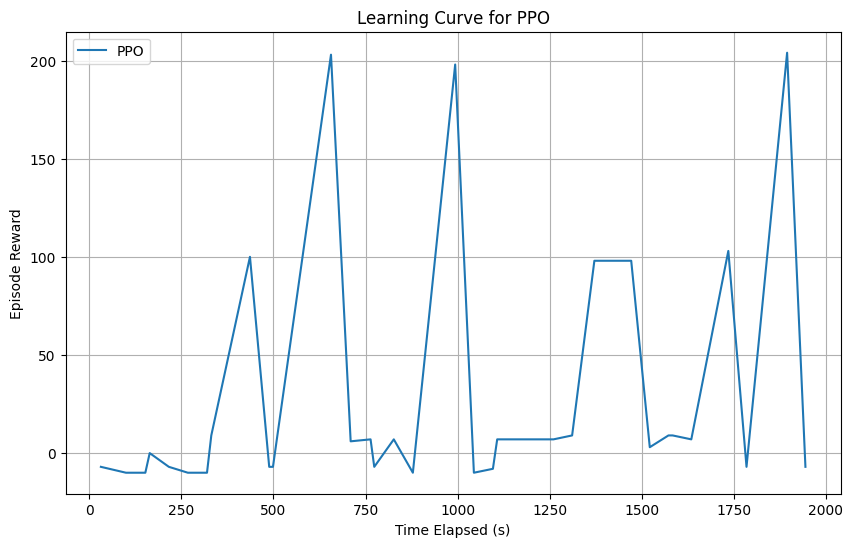

--- A2C Training Analysis ---
Total Episodes:         53
Mean Reward:            -7.00
Median Reward:          -7.00
Reward Std Dev:         0.00
Total Training Time:    2255.48 seconds



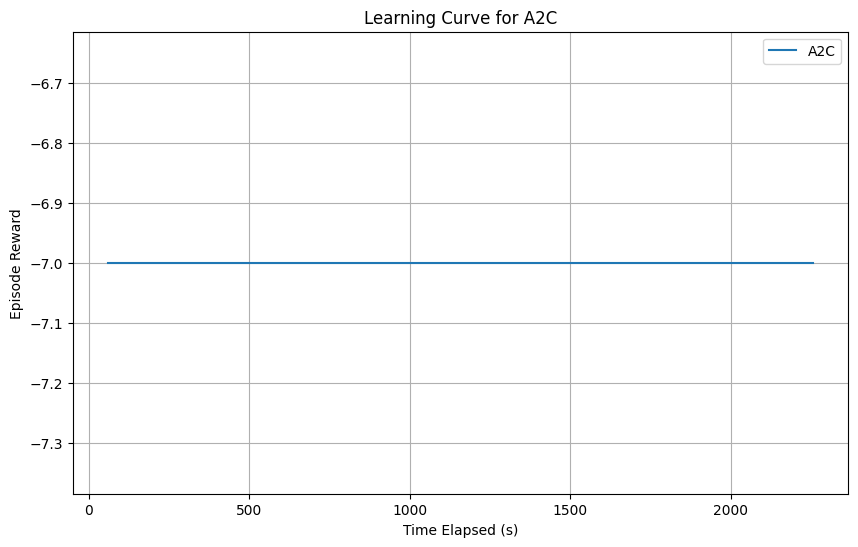

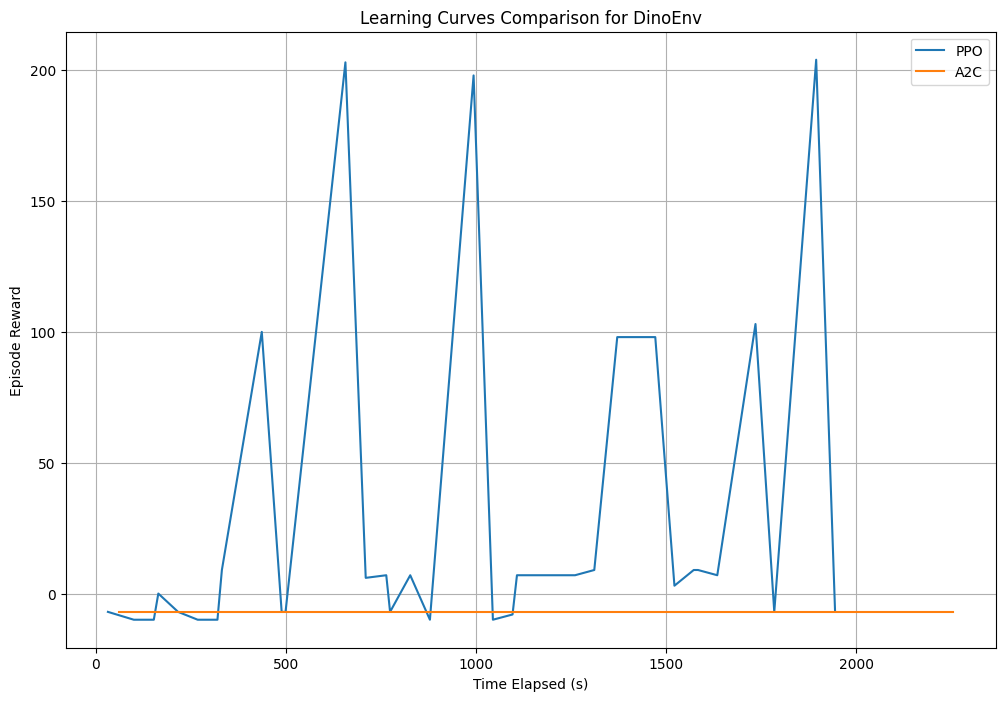

=== Combined Training Summary ===
     num_episodes  mean_reward  median_reward  std_reward   total_time
PPO          35.0    28.028571            7.0   63.261588  1944.268918
A2C          53.0    -7.000000           -7.0    0.000000  2255.475981


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt


log_dirs = {
    "PPO": "./logs_dino_PPO",
    "A2C": "./logs_dino_A2C"
}


training_summary = {}

for algo_name, log_dir in log_dirs.items():
    monitor_file = os.path.join(log_dir, "monitor.csv")

    if not os.path.exists(monitor_file):
        print(f"[{algo_name}] Monitor file not found in {log_dir}.")
        continue

    # Read the monitor CSV file. Skip the header line.
    df = pd.read_csv(monitor_file, skiprows=1)

    if df.empty:
        print(f"[{algo_name}] No training data found in {monitor_file}.")
        continue

    # Ensure that the columns exist
    if "r" not in df.columns or "t" not in df.columns:
        print(f"[{algo_name}] Required columns ('r', 't') not found in {monitor_file}.")
        continue

    num_episodes = len(df)
    mean_reward = df['r'].mean()
    median_reward = df['r'].median()
    std_reward = df['r'].std()
    total_time = df['t'].iloc[-1]  # total training time in seconds

    training_summary[algo_name] = {
        "num_episodes": num_episodes,
        "mean_reward": mean_reward,
        "median_reward": median_reward,
        "std_reward": std_reward,
        "total_time": total_time,
    }

    print(f"--- {algo_name} Training Analysis ---")
    print(f"Total Episodes:         {num_episodes}")
    print(f"Mean Reward:            {mean_reward:.2f}")
    print(f"Median Reward:          {median_reward:.2f}")
    print(f"Reward Std Dev:         {std_reward:.2f}")
    print(f"Total Training Time:    {total_time:.2f} seconds")
    print()

    # Plot the learning curve for this algorithm
    plt.figure(figsize=(10, 6))
    plt.plot(df['t'], df['r'], label=algo_name)
    plt.xlabel("Time Elapsed (s)")
    plt.ylabel("Episode Reward")
    plt.title(f"Learning Curve for {algo_name}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Optionally, compare the learning curves on a single plot
plt.figure(figsize=(12, 8))
for algo_name, log_dir in log_dirs.items():
    monitor_file = os.path.join(log_dir, "monitor.csv")
    if os.path.exists(monitor_file):
        df = pd.read_csv(monitor_file, skiprows=1)
        if not df.empty and "t" in df.columns and "r" in df.columns:
            plt.plot(df['t'], df['r'], label=algo_name)
plt.xlabel("Time Elapsed (s)")
plt.ylabel("Episode Reward")
plt.title("Learning Curves Comparison for DinoEnv")
plt.legend()
plt.grid(True)
plt.show()

# Print a combined training summary table
print("=== Combined Training Summary ===")
summary_df = pd.DataFrame(training_summary).T
print(summary_df)


# Testing the Learned Policies

In this cell, we test the trained PPO and A2C models:
- Each model is loaded and evaluated on a fresh instance of the Dino environment.
- The agent's performance (total reward) is recorded.
- The test episode is captured and saved as a GIF, which is then displayed.

This final step allows us to visually inspect and compare the policies learned by the different algorithms.



--- Testing PPO Model ---
Environment reset!
Total reward achieved by PPO: 150
Saved GIF as PPO_test_episode.gif
Displaying PPO test episode GIF:


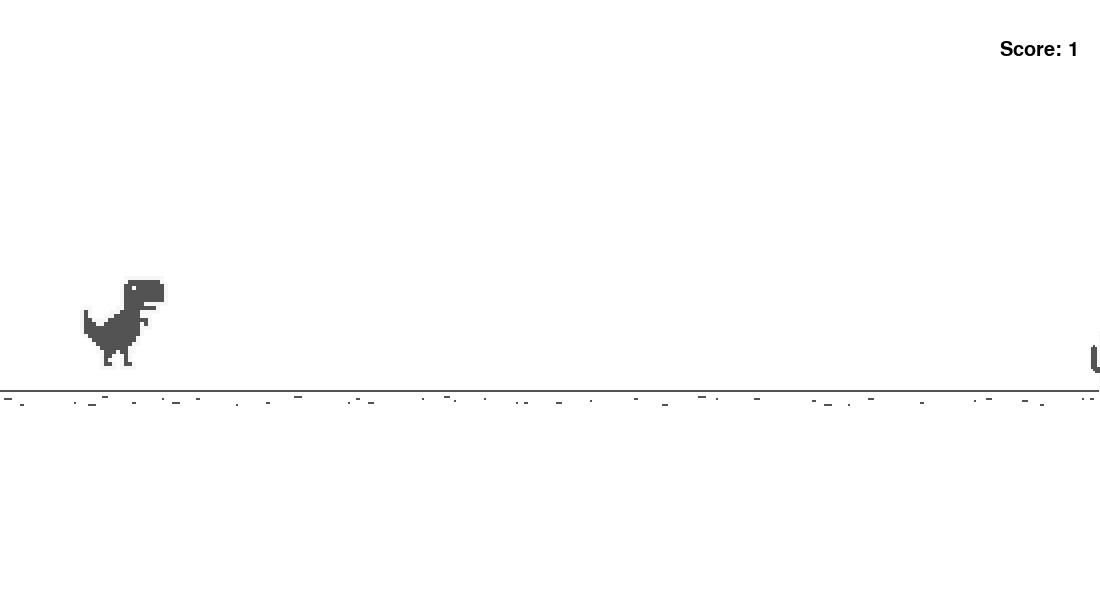


--- Testing A2C Model ---
Environment reset!
Total reward achieved by A2C: -7
Saved GIF as A2C_test_episode.gif
Displaying A2C test episode GIF:


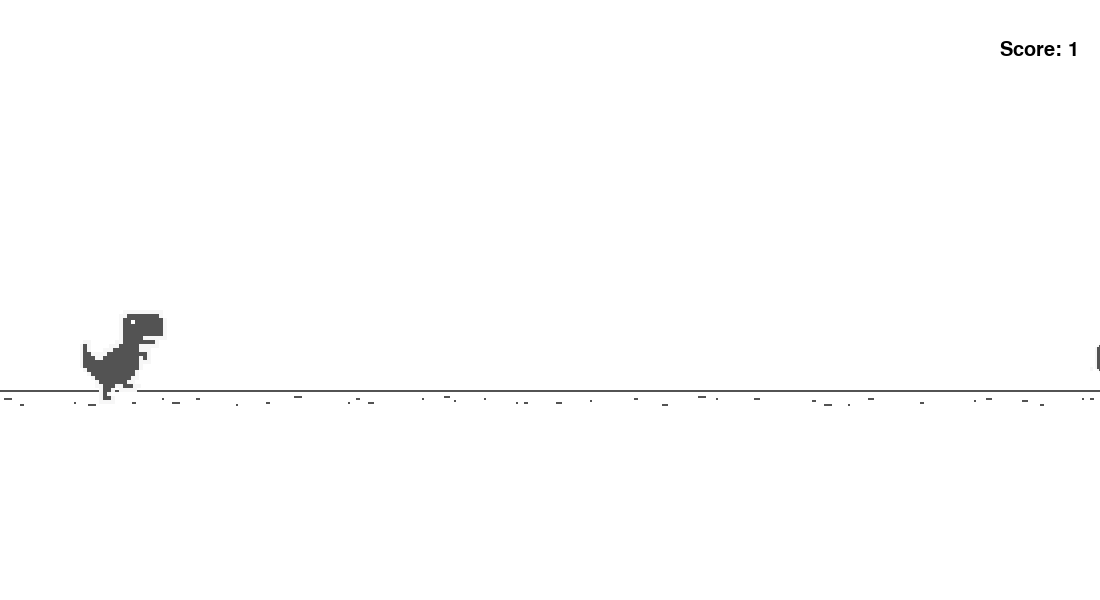

In [ ]:
import time
from IPython.display import Image, display
from stable_baselines3 import PPO, A2C

model_paths = {
    "PPO": "./logs_dino_PPO/PPO_dino_model.zip",
    "A2C": "./logs_dino_A2C/A2C_dino_model.zip",
}

for algo_name, model_path in model_paths.items():
    print(f"\n--- Testing {algo_name} Model ---")

    if algo_name == "PPO":
        model = PPO.load(model_path, device="cpu")
    elif algo_name == "A2C":
        model = A2C.load(model_path, device="cpu")
    else:
        raise ValueError(f"Unknown algorithm: {algo_name}")

    env = DinoEnv()
    obs, _ = env.reset()
    done = False
    total_reward = 0
    env.frames = []

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        action = int(action)  # Ensure action is an integer
        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        # Stop testing if total_reward exceeds 150
        if total_reward >= 150:
            done = True
            break

        time.sleep(0.05)
        done = terminated or truncated

    print(f"Total reward achieved by {algo_name}: {total_reward}")

    gif_filename = f"{algo_name}_test_episode.gif"
    env.save_gif(gif_filename, fps=30)
    env.close()

    print(f"Displaying {algo_name} test episode GIF:")
    display(Image(filename=gif_filename))

